In [1]:
from __init__ import DATASET_PATH


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, PredictionErrorDisplay
from tqdm import tqdm

from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectPercentile
# https://jundongl.github.io/scikit-feature/algorithms.html
from skfeature.function.statistical_based import gini_index


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, r_regression, f_regression, mutual_info_regression, RFECV
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
gmean_scorer = make_scorer(geometric_mean_score)

import dtreeviz

from textwrap import wrap
from functools import reduce

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from main.components.scaler import Scaler
from main.components.imputer import Imputer
from main.components.one_hot_encoder import CustomOneHotEncoder
from main.constants import CATEGORICAL_ATTRIBUTES, CONTINUOUS_ATTRIBUTES, IGF, PROLACTIN, VITAMINE_D, PCO
from main.components.preprocessing_methods import get_continuous_attributes_except, get_categorical_attributes_except, explore_all_variations_of_preprocessing

from main.components.hyperparameter_tuning_methods import hyperparameter_tuning_general, hyperparameter_tuning_linear, compare_random_states, train_model, validate_model_classification
from main.components.feature_importance_methods import feature_selection_gini_index, feature_selection_chi2, plot_fancy_tree, plot_fancy_tree_smote, get_feature_importance_logistic_regressison, get_feature_importance_tree, get_feature_importance_rf, rename_importnace_col, merge_feature_importances, rank_importances, feature_selection_mutual_info_classification, recursive_feature_elimination, get_permutation_importance


from imblearn.pipeline import Pipeline as ImblearnPipeline
from imblearn.over_sampling import SMOTENC


import random
from main.components.hyperparameter_tuning_methods import validate_model_classification_smote


import nest_asyncio
nest_asyncio.apply()

pd.set_option('display.max_columns', None) # enable showing all columns of the df
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [2]:
dataset_file_path = DATASET_PATH
df = pd.read_csv(dataset_file_path)
df.sample(5)

PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  IGF-1 ng/ml (N: 100-311)  proBNP  AMH (ng/ml) *7,14=pmol/l  weight  height (cm)        BMI  systolic BP (ciśnienie skurczowe)  diastolic BP (ciśnienie rozskurczowe)  Hypertension  Waist Circumference (WC)  WC>88  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHTR (Waist/Height Ratio)  WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight, 2-obesity  irregular cycles (0-nie, 1-tak)  ovulation (0-brak, 1-obecna)  PCO ovary morfology in USG (0-brak, 1--obecna)  stromal hypertrophy in ovary (0-brak, 1-obecny)  acne  hirsutism  FG score (Ferriman-Gallway score - stopień androgenizacji)  hyperandrogenism  elevated DHT  hypothyroidism  Volume of the thyroid  Right Lobe  Volume of the thyroid  Left Lobe  thyroid volume  nodules 0-lack, 1-RL,  2-LL, 3-both  chronic thyroiditis  Vole of the Right Ovary  Volume of the  Left Ovary  ovaries volume - total  follicules >12  WBC x10^3/ul  \
665                                                         1                       NaN     NaN                       NaN    57.0        165.0  20.936639                                NaN                                    NaN           NaN                      75.0    0.0                    85.0               0.882353             1.0              1.0                   0.454545       0.0                                                       0.0                              NaN                           NaN                                             NaN                                              NaN   NaN        NaN                                                         NaN               NaN           NaN             NaN                                NaN                               NaN             NaN                                  NaN                  NaN                      NaN                        NaN                     NaN             NaN          5.42   
205                                                         0                       NaN     NaN                       NaN    50.5        169.0  17.681454                                NaN                                    NaN           NaN                      69.0    0.0                    79.0               0.873418             1.0              1.0                   0.408284       0.0                                                       0.0                              0.0                           NaN                                             NaN                                              NaN   0.0        0.0                                                         NaN               NaN           NaN             1.0                              4.199                             4.250           8.449                                  2.0                  1.0                      NaN                        NaN                     NaN             NaN          5.80   
533                                                         1                     236.0   52.37                  9.200000    57.0        171.0  19.493177                                NaN                                    NaN           NaN                      78.0    0.0                    83.0               0.939759             1.0              1.0                   0.456140       0.0                                                       0.0                              1.0                           0.0                                             1.0                                              1.0   1.0        0.0                                                         4.0               1.0           1.0             1.0                              3.549                             3.276           6.825                                  0.0                  1.0                      NaN                        NaN                     NaN             NaN          4.36   
105                                                      

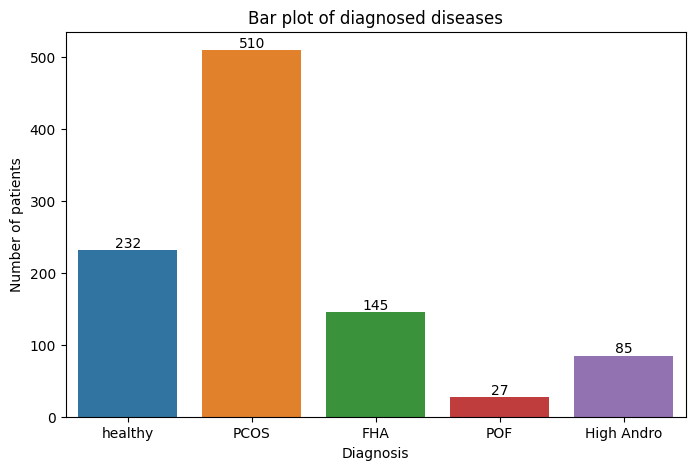

In [3]:
labels = {0: 'healthy', 1: 'PCOS', 2: 'FHA', 3: 'POF', 4: 'High Andro'}
df['PCO_label'] = df[PCO].map(labels)

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='PCO_label', order=['healthy', 'PCOS', 'FHA', 'POF', 'High Andro'], hue='PCO_label')

for i, p in enumerate(ax.patches):
    ax.bar_label(ax.containers[i])

plt.xlabel('Diagnosis')
plt.ylabel('Number of patients')
plt.title('Bar plot of diagnosed diseases')
plt.show()

(999, 134)


<Axes: >

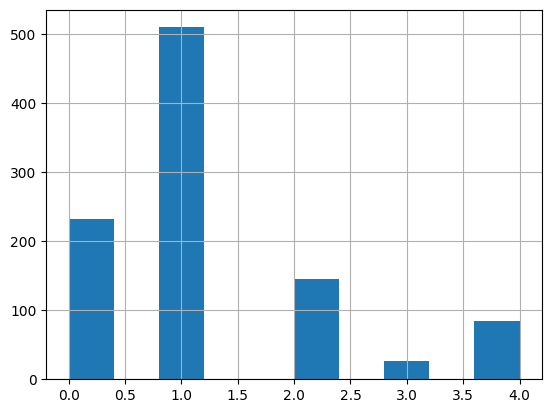

In [4]:
print(df.shape)
df[PCO].hist()

# Model selection for PCO

In [5]:
CLASS_NAMES = ['healthy', 'PCOS', 'FHA', 'POF', 'High Andro']

In [6]:
df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=[PCO]), df_cleaned[PCO]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Best preprocessing

In [7]:
from sklearn.neighbors import KNeighborsRegressor


continuous_preprocessor_tree_hyperparam_tuning = Pipeline([('imputer', KNNImputer(n_neighbors=10))])
continuous_preprocessor_tree = Pipeline([('imputer',  IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))])


continuous_preprocessor_hyperparam_tuning = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=10))])
continuous_preprocessor =  Pipeline([('scaler', MinMaxScaler()), ('imputer', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))])


categorical_preprocessor = Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')), ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])


preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])

For smote

In [8]:
# continuous_imputer_pipeline = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=10))])
from sklearn.neighbors import KNeighborsRegressor


continuous_imputer_pipeline = Pipeline([('scaler', MinMaxScaler()), ('imputer', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))])

 # continuous_imputer_tree_pipeline = Pipeline([('imputer', KNNImputer(n_neighbors=10))])

continuous_imputer_tree_pipeline = Pipeline([('imputer', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))])

categorical_imputer_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')),
    ])

### Exploration

In [29]:
def explore_all_variations_of_preprocessing_claffisication(X_train, y_train, target_attribute, models, continuous_preprocessings, categorical_preprocessings, scoring_metric='gmean'):
    scores_df = pd.DataFrame(columns=['continuous_preprocessing', 'categorical_pteprocessing', 'model', str(scoring_metric)])

    i = 1
    total_iterations = len(continuous_preprocessings) * len(categorical_preprocessings) * len(models)

    for continuous_preprocessor_name, continuous_preprocessor in continuous_preprocessings.items():
        for categorical_preprocessor_name, categorical_preprocessor in categorical_preprocessings.items():
            for model in models:
                preprocessor = ColumnTransformer(
                    verbose_feature_names_out=False,
                    transformers=[
                        ('num', continuous_preprocessor, get_continuous_attributes_except(target_attribute)),
                        ('cat', categorical_preprocessor, get_categorical_attributes_except(target_attribute))
                    ])

                pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
                pipeline = get_smote_pipeline(model, target_attribute, get_continuous_attributes_except(target_attribute),  get_categorical_attributes_except(target_attribute), continuous_preprocessor, categorical_preprocessor)

                cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
                scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=scoring_metric, n_jobs=-1)
                
                scores_df.loc[len(scores_df)] = [continuous_preprocessor_name, categorical_preprocessor_name, str(model), abs(scores.mean())]
                print(f'{i}/{total_iterations}', str(model), continuous_preprocessor_name, categorical_preprocessor_name, scores, abs(scores.mean()))
                i += 1

    return scores_df


def get_smote_pipeline(model, target_attribute, continuous_attributes, categorical_attributes, continous_imputer_pipeline, categorical_imputer_pipeline):
    imputer_transformer = ColumnTransformer(
        verbose_feature_names_out=False,
        transformers=[
            ('num', continous_imputer_pipeline, continuous_attributes),
            ('cat', categorical_imputer_pipeline, categorical_attributes)
        ])
    imputer_transformer.set_output(transform='pandas')

    smt = SMOTENC(random_state=42, categorical_features=categorical_attributes)

    categorical_one_hot_encoder = Pipeline([
        ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary', sparse_output=False)),
        ])

    one_hot_encoding_transformer = ColumnTransformer(
            verbose_feature_names_out=False,
            remainder='passthrough',
            transformers=[
                ('cat', categorical_one_hot_encoder, categorical_attributes),
            ]).set_output(transform='pandas')
    

    model_pipeline = ImblearnPipeline([
                ('imputing', imputer_transformer),
                ('smt', smt),
                ('preprocessor', one_hot_encoding_transformer),
                ('model', model),
                ])

    return model_pipeline




In [34]:

from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler


models = [
        LogisticRegression(),
        KNeighborsClassifier(),
        ]


continuous_preprocessings = {
    # 'Min Max': Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=10))]),
    # 'Standard Scaler': Pipeline([('scaler', StandardScaler()), ('imputer', KNNImputer(n_neighbors=10))]),
    # 'Power Transformer': Pipeline([('scaler', PowerTransformer()), ('imputer', KNNImputer(n_neighbors=10))]),
    
    'Min Max': Pipeline([('scaler', MinMaxScaler()), ('imputer', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))]),
    'Standard Scaler': Pipeline([('scaler', StandardScaler()), ('imputer', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))]),
    'Power Transformer': Pipeline([('scaler', PowerTransformer()), ('imputer', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))]),
}

categorical_preprocessings = {
    'ii_imputer': Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='most_frequent'))]),
}



scores_df = explore_all_variations_of_preprocessing_claffisication(X_train, y_train, PCO, models, continuous_preprocessings, categorical_preprocessings, scoring_metric=gmean_scorer)
scores_df.sort_values(by="make_scorer(geometric_mean_score, response_method='predict')", ascending=False)

1/6 LogisticRegression() Min Max ii_imputer [0.52256671 0.50243236 0.58888273 0.50064789 0.         0.45918372
 0.         0.67731236 0.58708412 0.         0.55167284 0.
 0.51964509 0.45824012 0.51123011] 0.39192653719638937
2/6 KNeighborsClassifier() Min Max ii_imputer [0.         0.         0.49784148 0.         0.         0.44607707
 0.57491393 0.60029761 0.         0.         0.47542793 0.
 0.58832316 0.39572213 0.        ] 0.23857355378602743
3/6 LogisticRegression() Standard Scaler ii_imputer [0.53476403 0.5723528  0.55185324 0.47760777 0.         0.48859709
 0.         0.64679398 0.52371045 0.37716495 0.         0.
 0.58013619 0.52769585 0.47276788] 0.3835629483229356
4/6 KNeighborsClassifier() Standard Scaler ii_imputer [0.35400063 0.36875143 0.45418308 0.39081261 0.         0.34674114
 0.         0.470239   0.45216998 0.29730716 0.         0.
 0.44087    0.38085877 0.33618275] 0.2861411041720234
5/6 LogisticRegression() Power Transformer ii_imputer [0.53108833 0.54052015 0.533

continuous_preprocessing categorical_pteprocessing                   model  make_scorer(geometric_mean_score, response_method='predict')
0                  Min Max                ii_imputer    LogisticRegression()                                                      0.391927
4        Power Transformer                ii_imputer    LogisticRegression()                                                      0.384611
2          Standard Scaler                ii_imputer    LogisticRegression()                                                      0.383563
3          Standard Scaler                ii_imputer  KNeighborsClassifier()                                                      0.286141
5        Power Transformer                ii_imputer  KNeighborsClassifier()                                                      0.262176
1                  Min Max                ii_imputer  KNeighborsClassifier()                                                      0.238574

## Hyperparameter tuning

### Decision Tree

In [ ]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [4, 5, 6],
    'model__min_samples_leaf': [3, 4, 5],
    'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

In [11]:
model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter='random')

tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
tuned_df.abs.sort_values(by='cv_score', ascending=False).head(5)

100%|██████████| 99/99 [15:19<00:00,  9.28s/it]


cv_score
18 -0.493617
64 -0.504952
75 -0.507124
45 -0.509694
55 -0.509711

### Logistic Regression

Fitting 15 folds for each of 8 candidates, totalling 120 fits
Best parameters: {'model__C': 2}
Best score (f1_weighted): 0.715119149273523


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


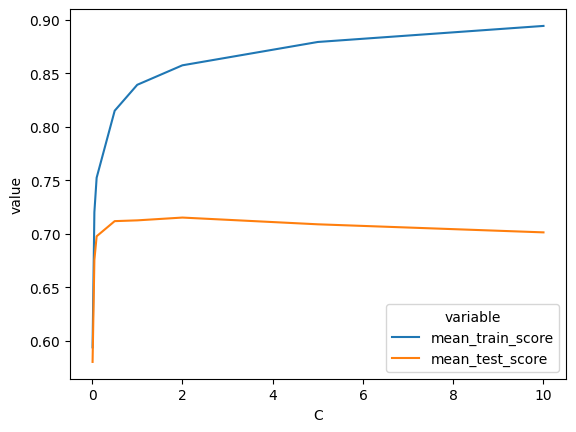

C  mean_train_score  mean_test_score
0  0.01          0.593938         0.580321
1  0.05          0.720085         0.675474
2   0.1          0.752316         0.697647
3   0.5          0.814890         0.711791
4     1          0.839098         0.712511
5     2          0.857298         0.715119
6     5          0.879089         0.708827
7    10          0.894077         0.701297

In [12]:
model_lr = LogisticRegression(multi_class='multinomial', max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, PCO, model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

Selected C=0.5

### Random Forest

In [72]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [5, 6, 7],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best score (f1_weighted): 0.7826160815395791


params  mean_train_score  mean_test_score
8  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.913822         0.782616
4  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.928839         0.780565
2  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.948672         0.780479
3  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.930861         0.778460
1  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.948119         0.778261
5  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.929055         0.778234
6  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.915132         0.777261
0  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.947720         0.775780
7  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.912644         0.774311

In [12]:
model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
tuned_df.abs().sort_values(by='cv_score', ascending=False).head(5)

100%|██████████| 99/99 [19:35<00:00, 11.88s/it]


cv_score
25  -0.39638
56 -0.398133
70 -0.399275
94 -0.402765
98 -0.405842

### SVM

In [ ]:
model_svc = SVC(n_jobs=-1, decision_function_shape='ovo')

param_grid_svc = {
    'model__kernel': ['linear', 'rbf', 'sigmoid'],
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': [0.1, 1, 10],
    'model__epsilon': [0.1, 0.2, 0.3],
}

svc_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_svc, continuous_preprocessor, categorical_preprocessor, param_grid_svc, scoring_metric='f1_weighted')
svc_h_scores.sort_values(by='mean_test_score', ascending=False)

## Best models

### DecisionTree

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


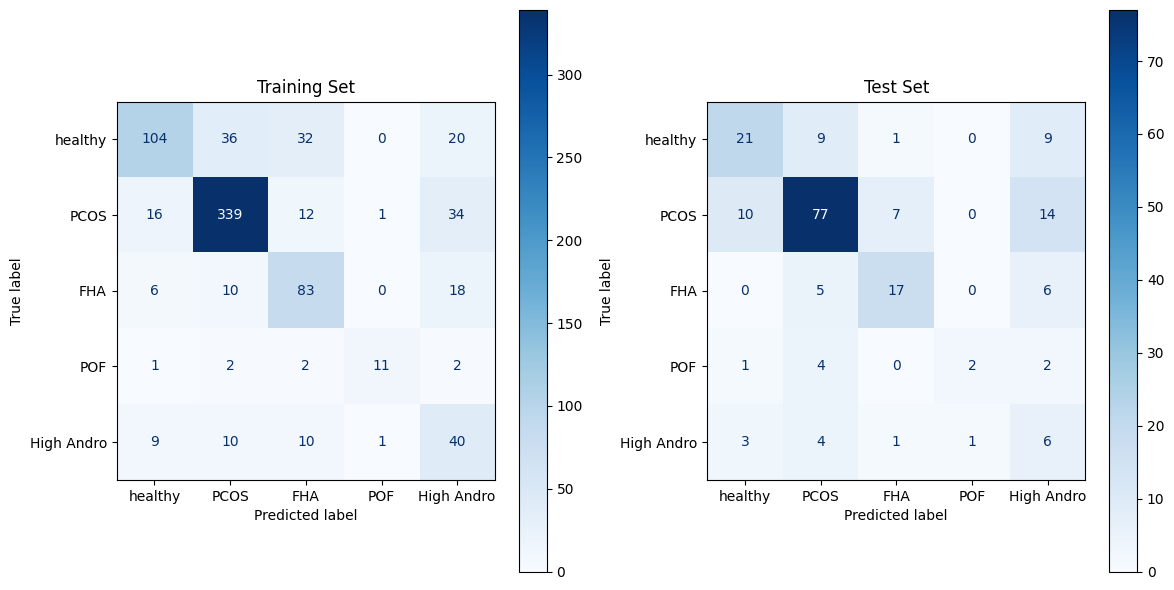

Training set
G-mean: 0.647
              precision    recall  f1-score   support

     healthy       0.76      0.54      0.63       192
        PCOS       0.85      0.84      0.85       402
         FHA       0.60      0.71      0.65       117
         POF       0.85      0.61      0.71        18
  High Andro       0.35      0.57      0.43        70

    accuracy                           0.72       799
   macro avg       0.68      0.66      0.66       799
weighted avg       0.75      0.72      0.73       799

G-mean: 0.458
Test set
              precision    recall  f1-score   support

     healthy       0.60      0.53      0.56        40
        PCOS       0.78      0.71      0.74       108
         FHA       0.65      0.61      0.63        28
         POF       0.67      0.22      0.33         9
  High Andro       0.16      0.40      0.23        15

    accuracy                           0.61       200
   macro avg       0.57      0.49      0.50       200
weighted avg       0.67    

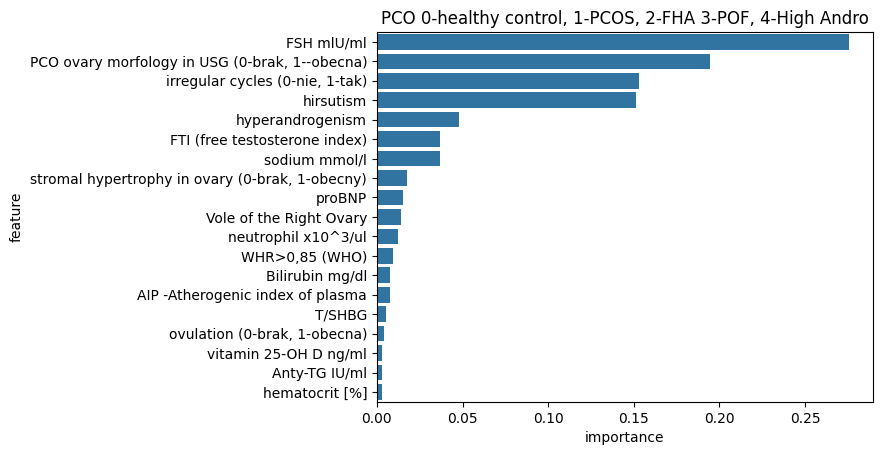

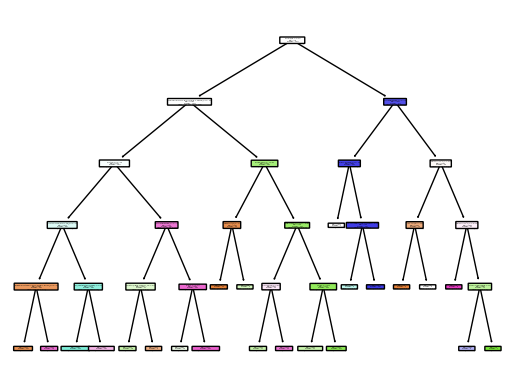

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


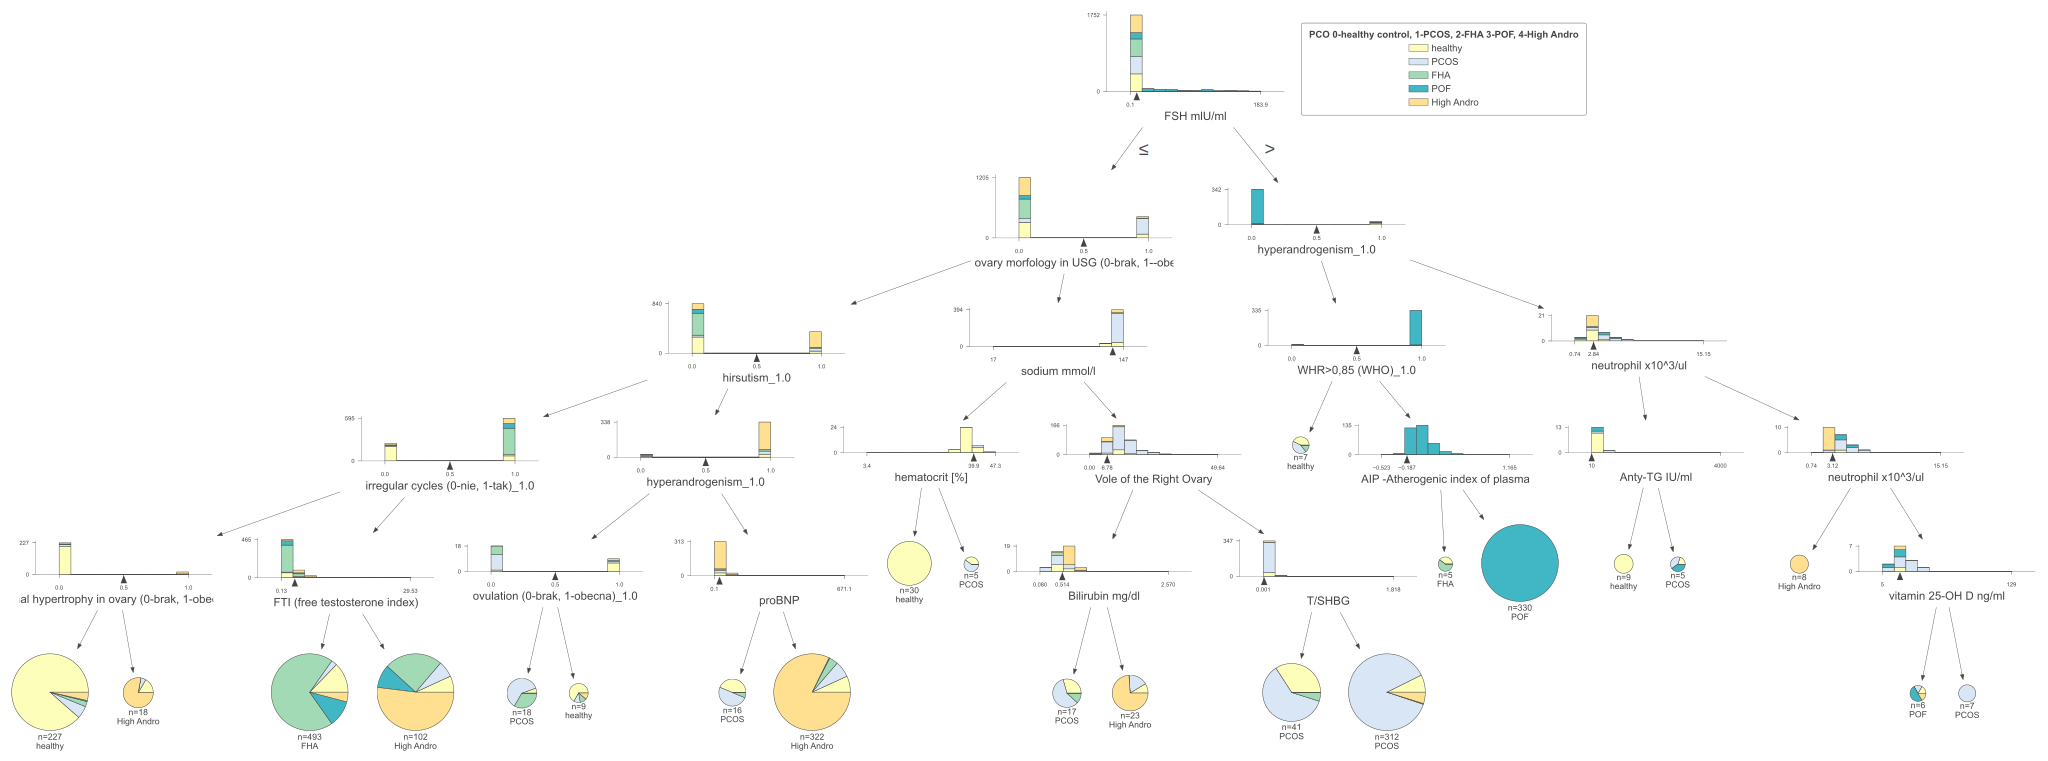

In [13]:
random.seed(0)

model_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, min_samples_split=10, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


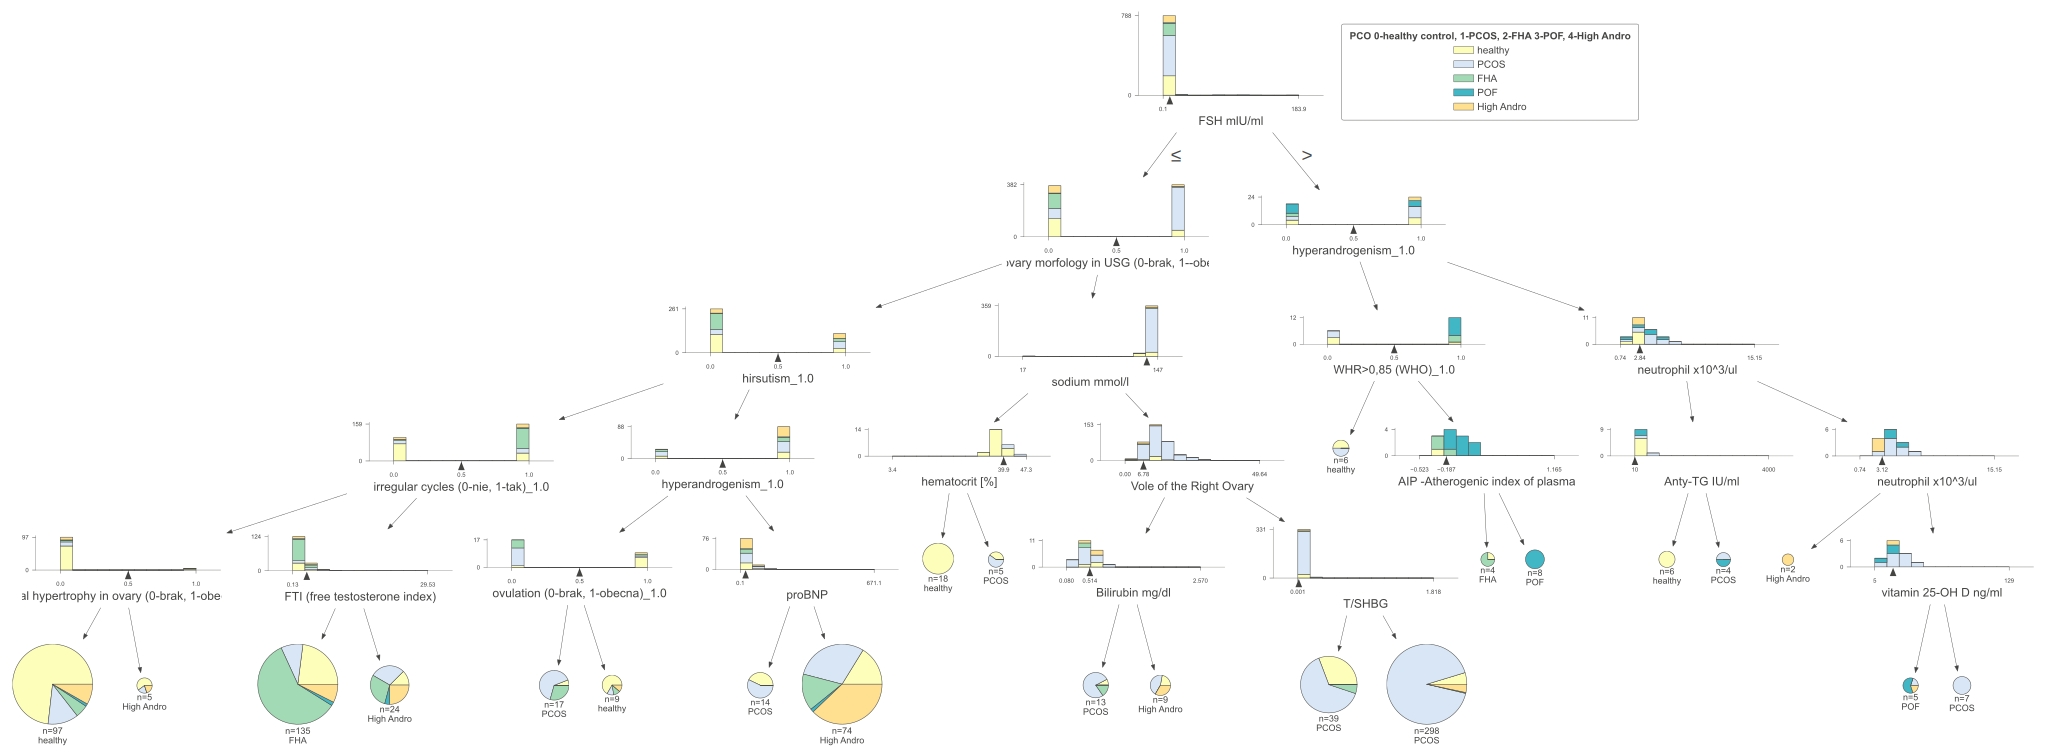

In [14]:

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=False, class_names=CLASS_NAMES)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


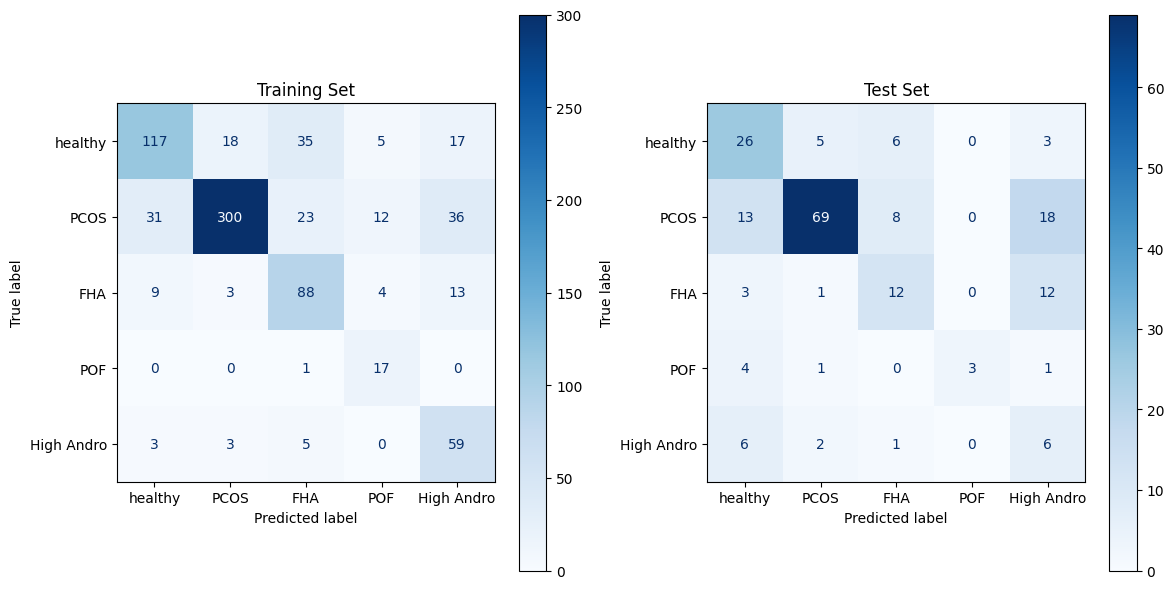

Training set
G-mean: 0.771
              precision    recall  f1-score   support

     healthy       0.73      0.61      0.66       192
        PCOS       0.93      0.75      0.83       402
         FHA       0.58      0.75      0.65       117
         POF       0.45      0.94      0.61        18
  High Andro       0.47      0.84      0.61        70

    accuracy                           0.73       799
   macro avg       0.63      0.78      0.67       799
weighted avg       0.78      0.73      0.74       799

G-mean: 0.473
Test set
              precision    recall  f1-score   support

     healthy       0.50      0.65      0.57        40
        PCOS       0.88      0.64      0.74       108
         FHA       0.44      0.43      0.44        28
         POF       1.00      0.33      0.50         9
  High Andro       0.15      0.40      0.22        15

    accuracy                           0.58       200
   macro avg       0.60      0.49      0.49       200
weighted avg       0.70    

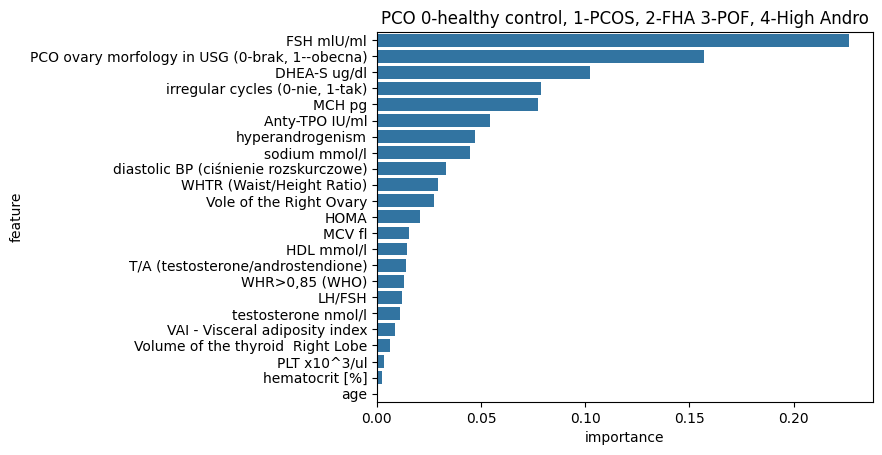

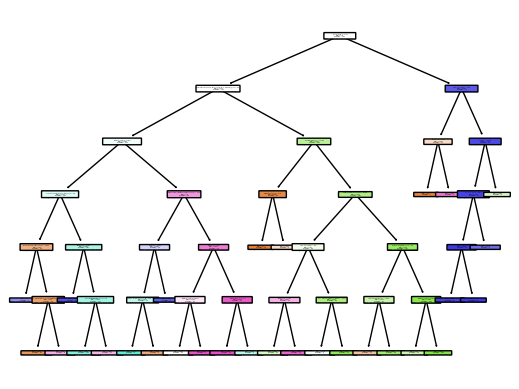

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


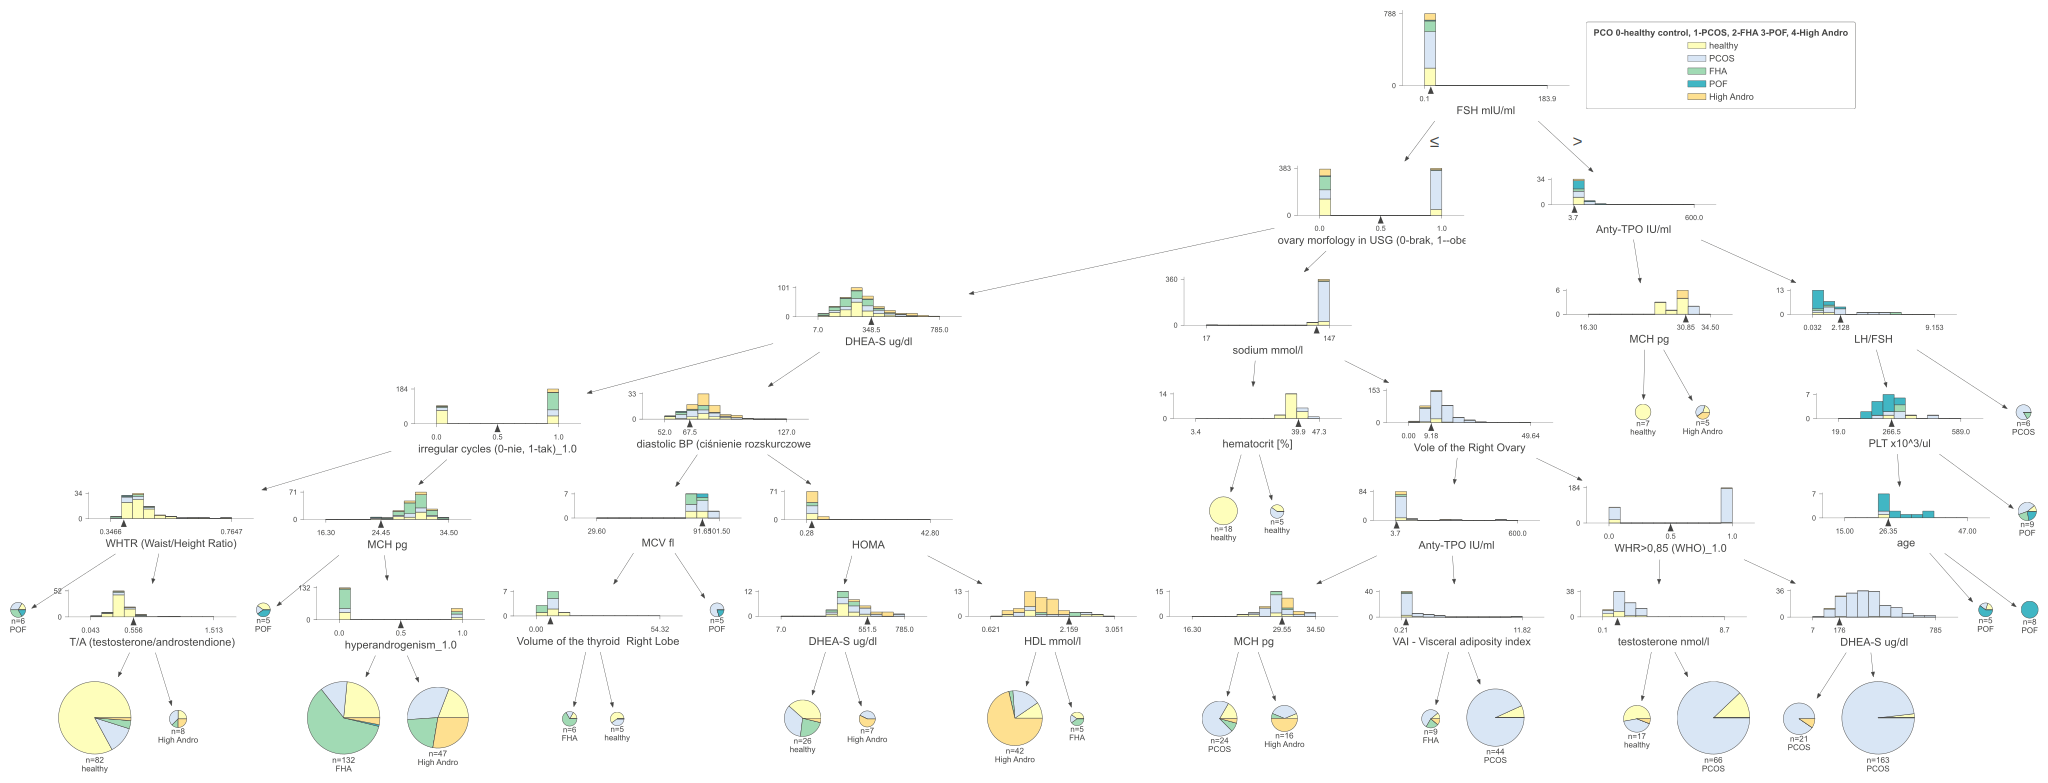

In [18]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=5, min_samples_split=10, class_weight='balanced', splitter='best')

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

### RandomForest

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


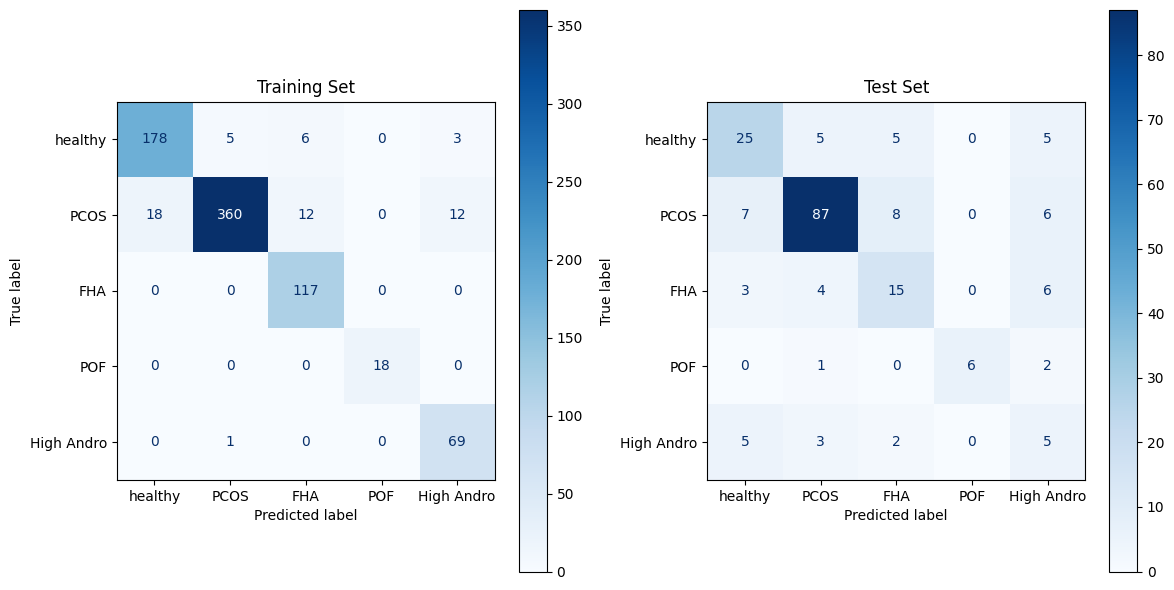

Training set
G-mean: 0.961
              precision    recall  f1-score   support

     healthy       0.91      0.93      0.92       192
        PCOS       0.98      0.90      0.94       402
         FHA       0.87      1.00      0.93       117
         POF       1.00      1.00      1.00        18
  High Andro       0.82      0.99      0.90        70

    accuracy                           0.93       799
   macro avg       0.92      0.96      0.94       799
weighted avg       0.93      0.93      0.93       799

G-mean: 0.57
Test set
              precision    recall  f1-score   support

     healthy       0.62      0.62      0.62        40
        PCOS       0.87      0.81      0.84       108
         FHA       0.50      0.54      0.52        28
         POF       1.00      0.67      0.80         9
  High Andro       0.21      0.33      0.26        15

    accuracy                           0.69       200
   macro avg       0.64      0.59      0.61       200
weighted avg       0.73     

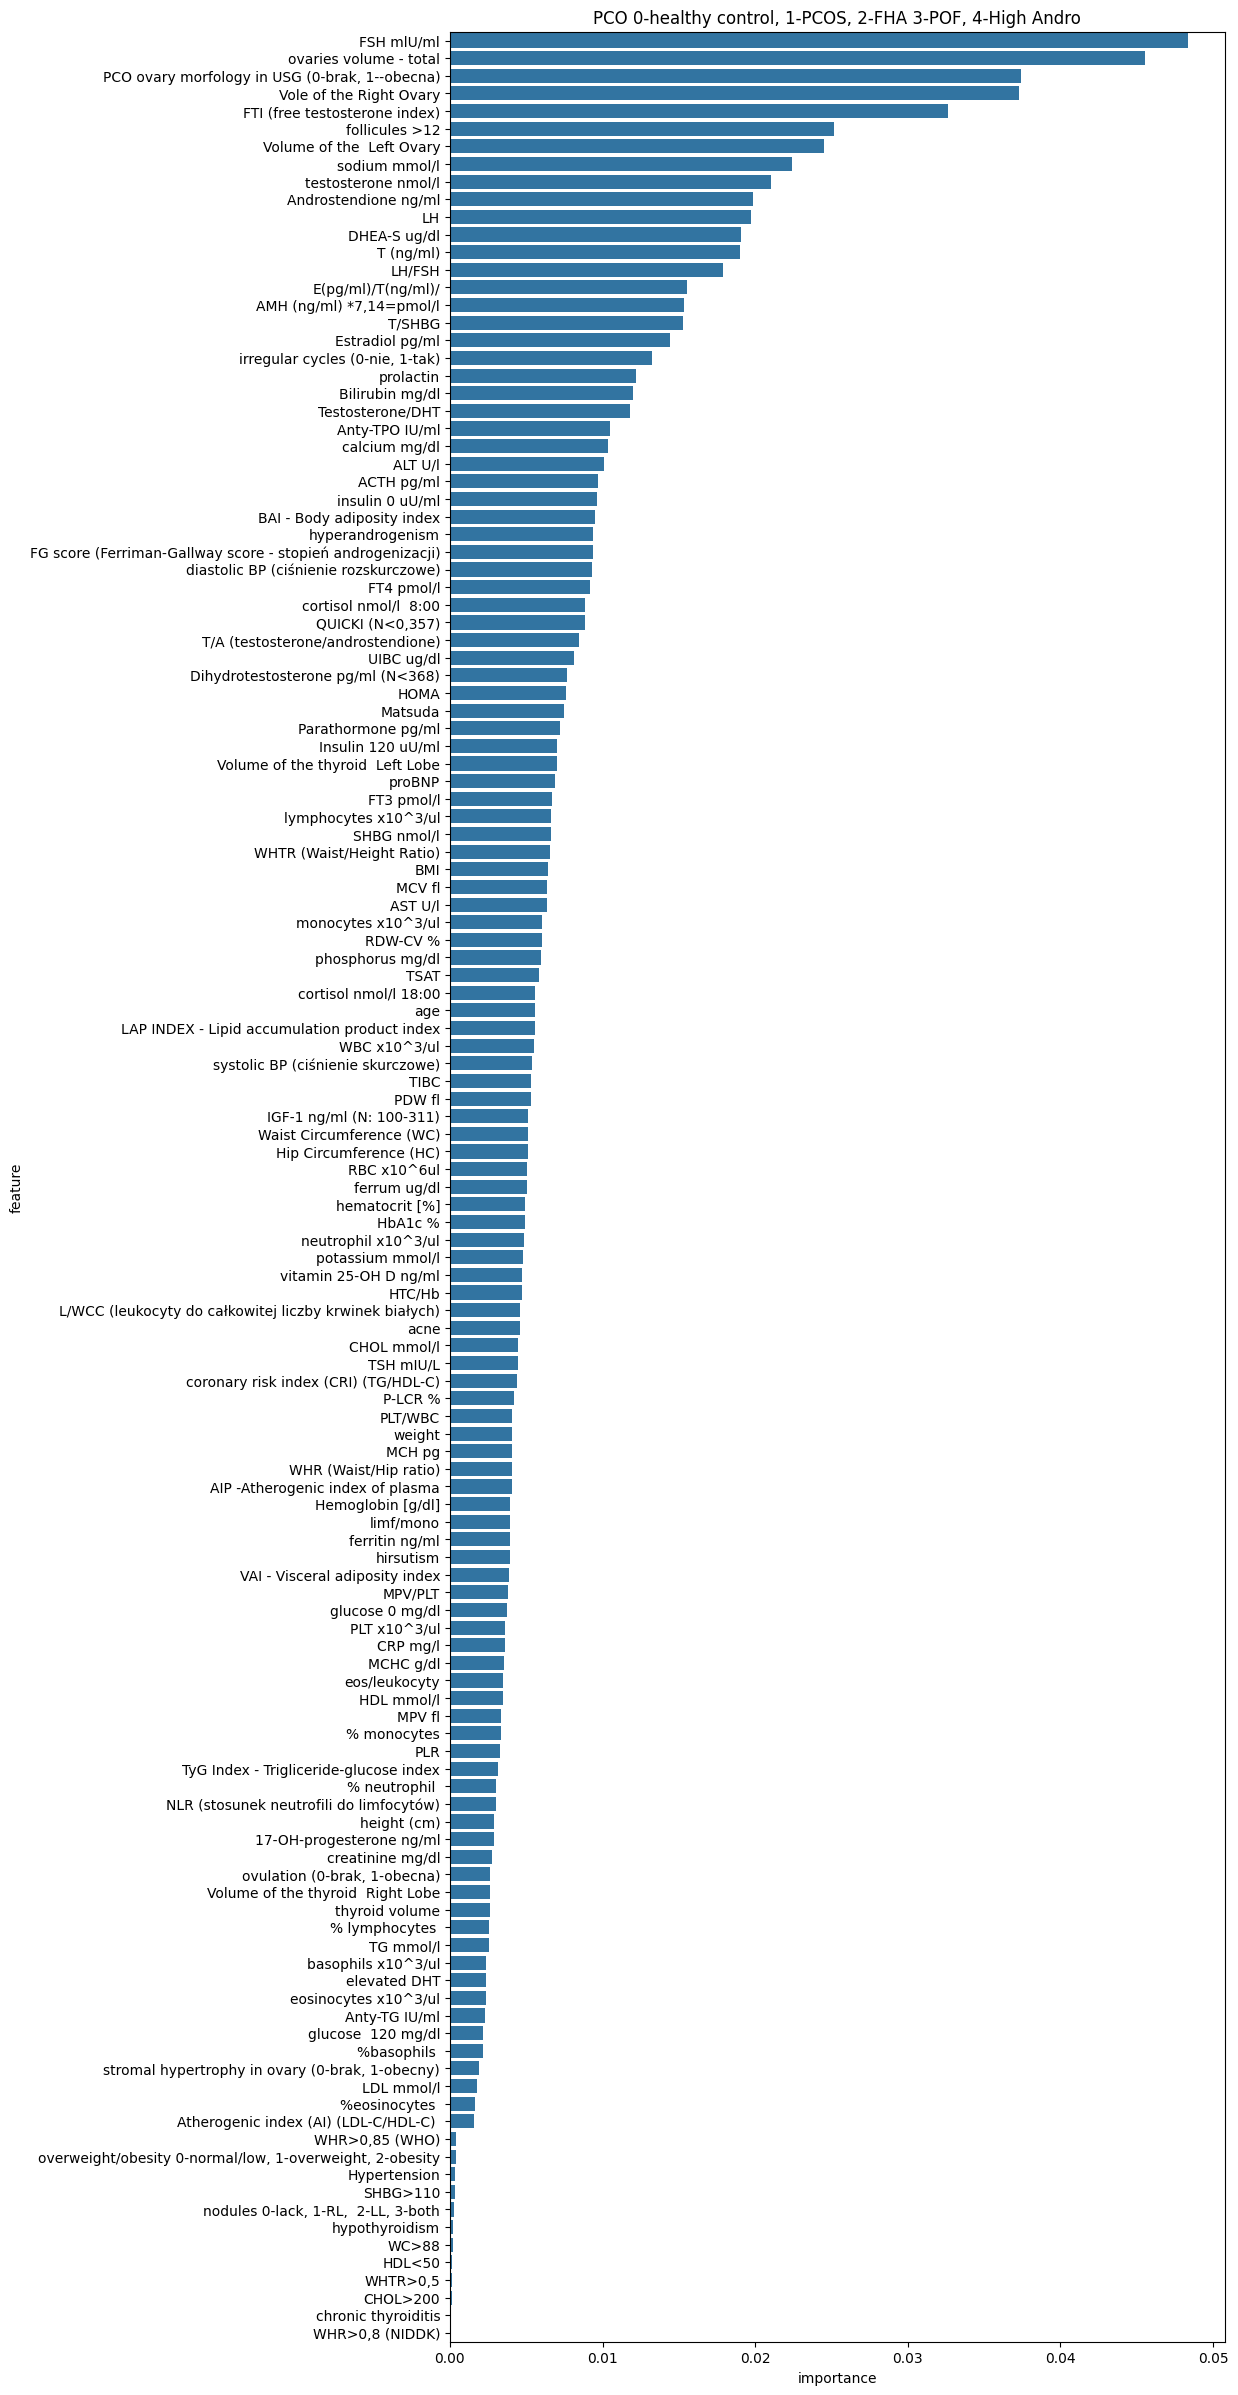

In [25]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=15, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


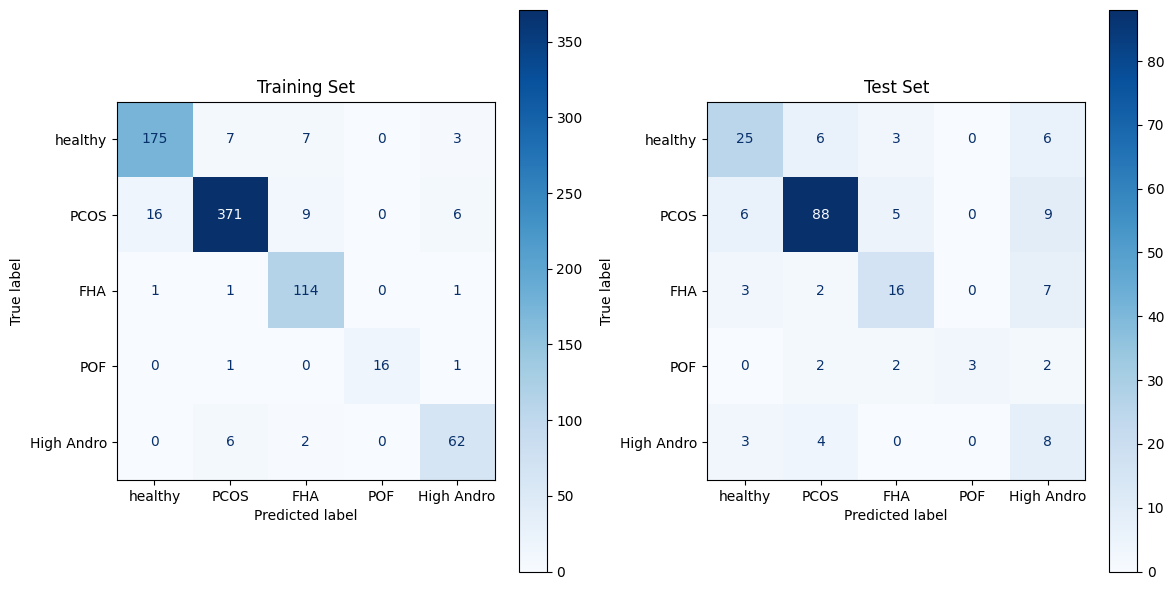

Training set
G-mean: 0.916
              precision    recall  f1-score   support

     healthy       0.91      0.91      0.91       192
        PCOS       0.96      0.92      0.94       402
         FHA       0.86      0.97      0.92       117
         POF       1.00      0.89      0.94        18
  High Andro       0.85      0.89      0.87        70

    accuracy                           0.92       799
   macro avg       0.92      0.92      0.92       799
weighted avg       0.93      0.92      0.92       799

G-mean: 0.553
Test set
              precision    recall  f1-score   support

     healthy       0.68      0.62      0.65        40
        PCOS       0.86      0.81      0.84       108
         FHA       0.62      0.57      0.59        28
         POF       1.00      0.33      0.50         9
  High Andro       0.25      0.53      0.34        15

    accuracy                           0.70       200
   macro avg       0.68      0.58      0.58       200
weighted avg       0.75    

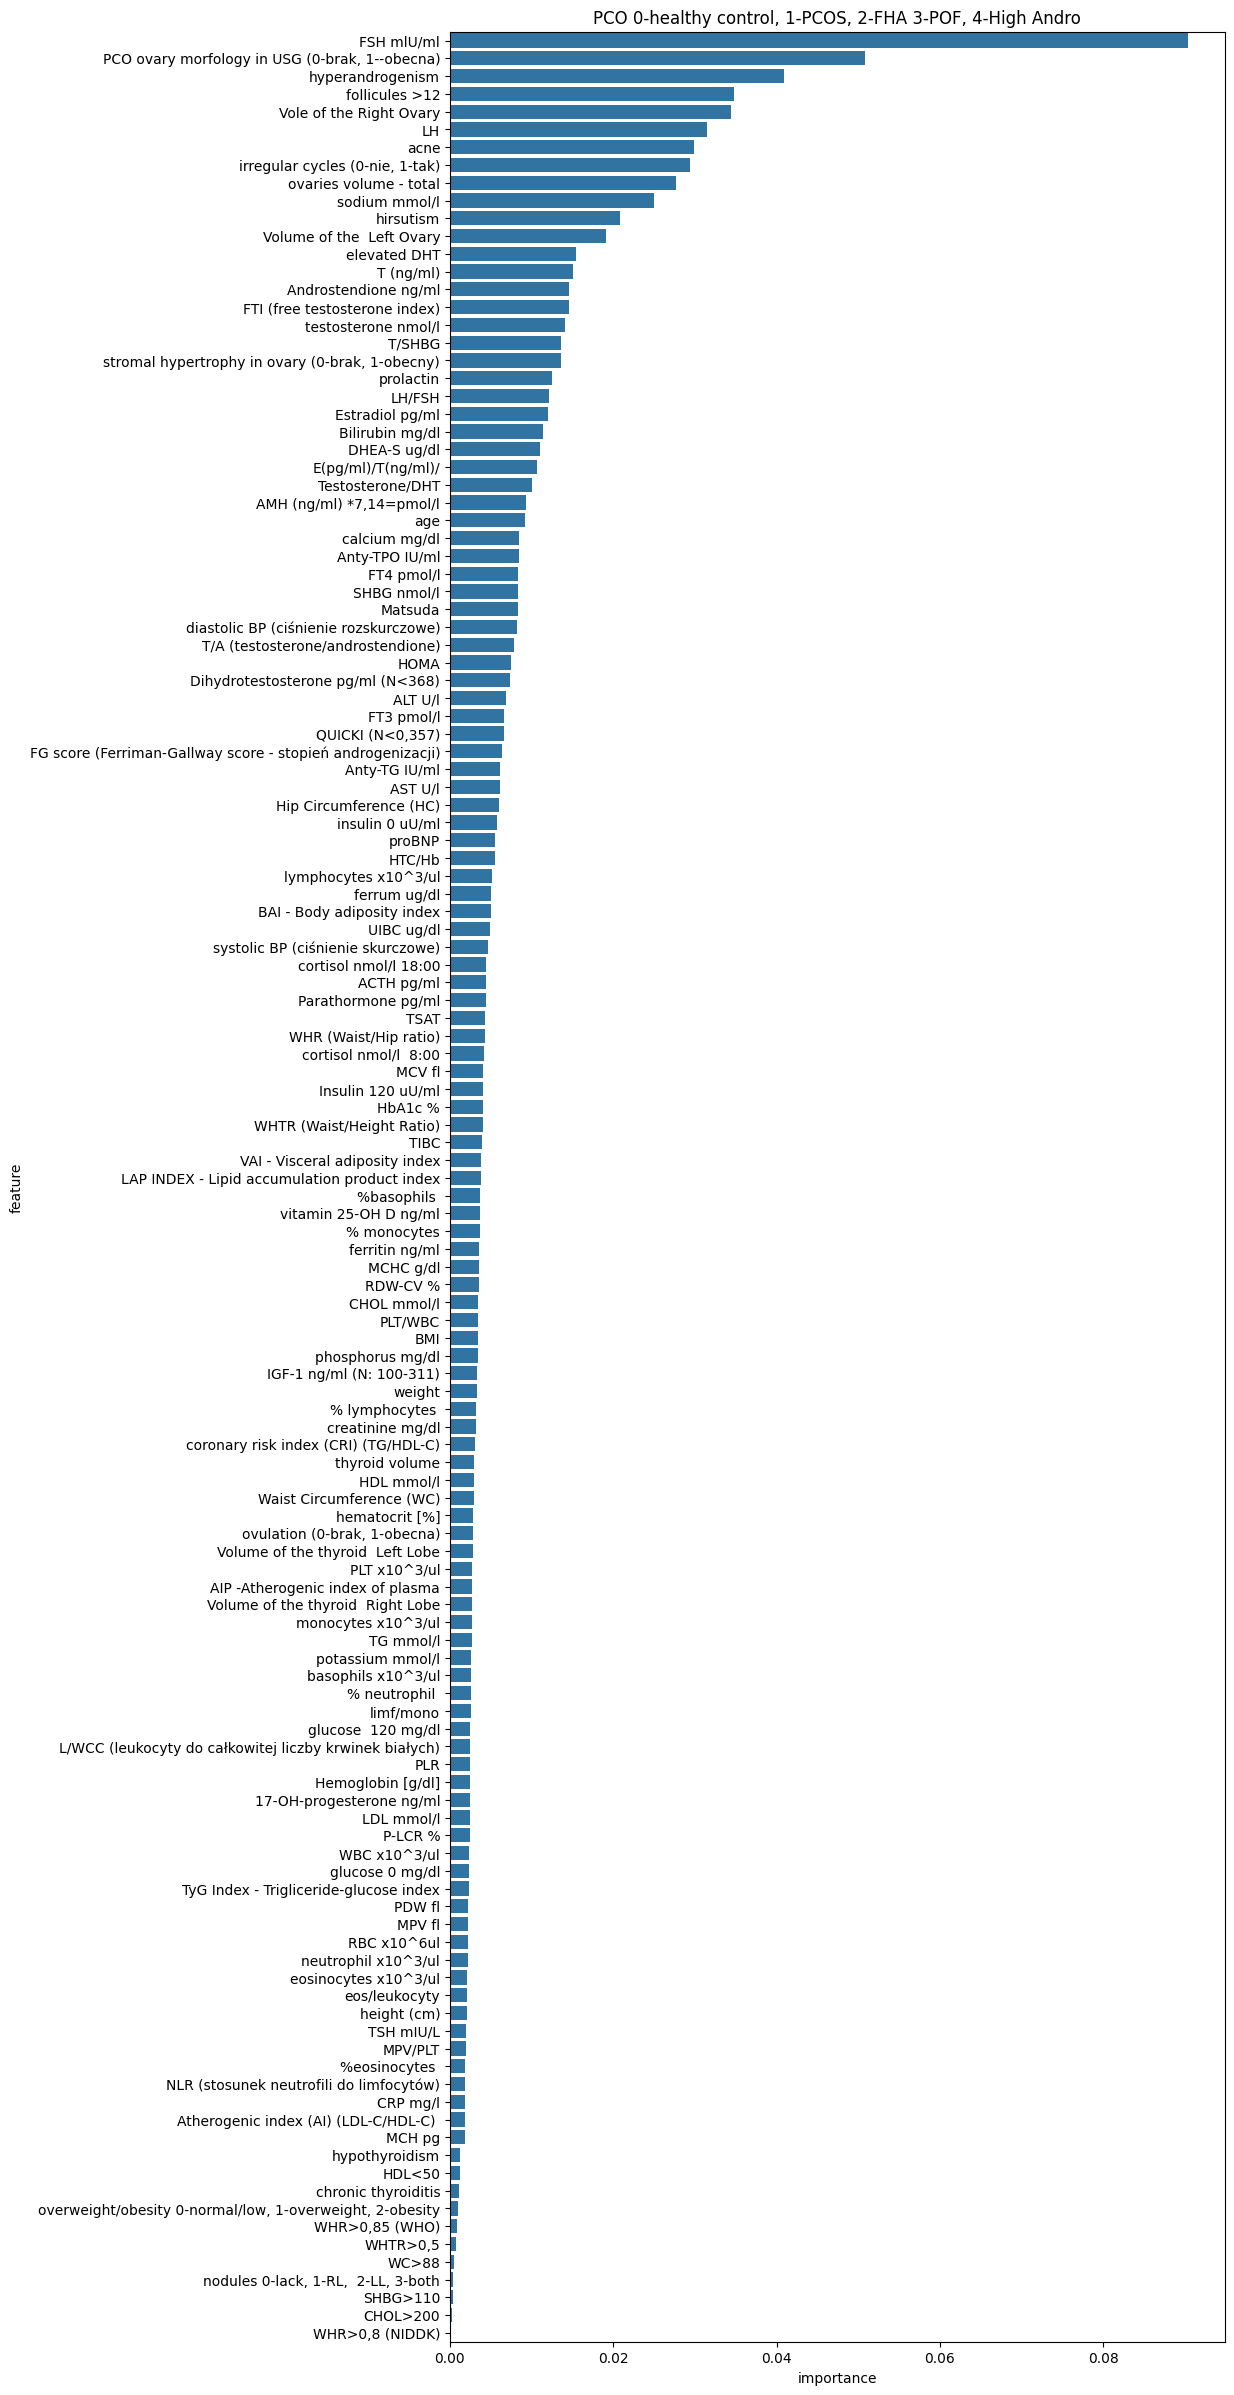

In [27]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=15, class_weight=None, random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification_smote(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_rf)


### Logistic Regression

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


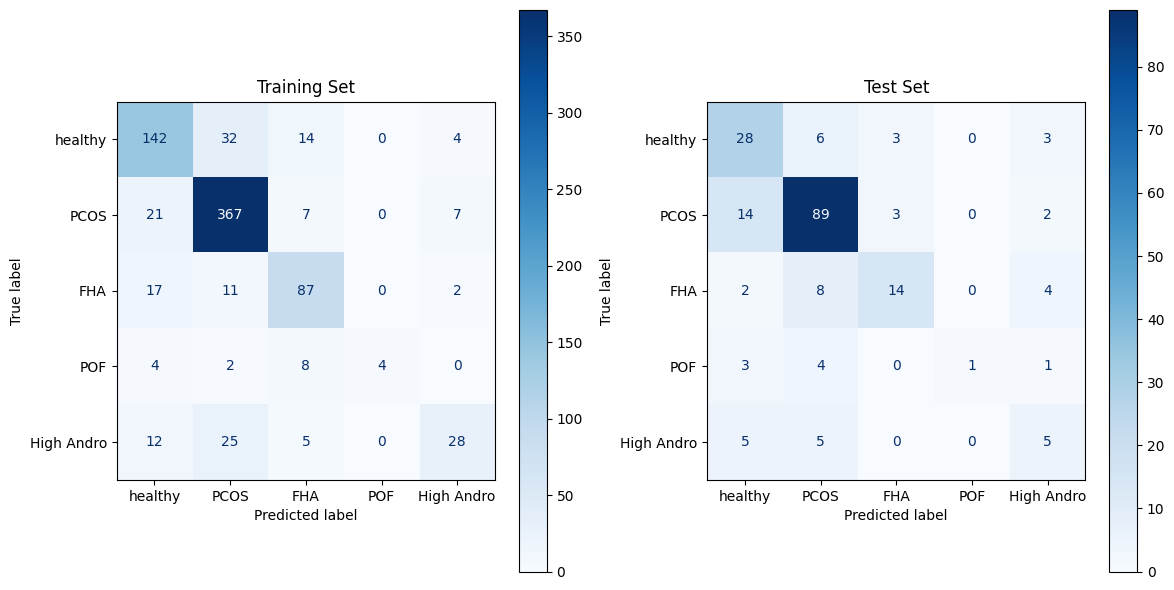

Training set
G-mean: 0.537
              precision    recall  f1-score   support

     healthy       0.72      0.74      0.73       192
        PCOS       0.84      0.91      0.87       402
         FHA       0.72      0.74      0.73       117
         POF       1.00      0.22      0.36        18
  High Andro       0.68      0.40      0.50        70

    accuracy                           0.79       799
   macro avg       0.79      0.60      0.64       799
weighted avg       0.78      0.79      0.78       799

G-mean: 0.403
Test set
              precision    recall  f1-score   support

     healthy       0.54      0.70      0.61        40
        PCOS       0.79      0.82      0.81       108
         FHA       0.70      0.50      0.58        28
         POF       1.00      0.11      0.20         9
  High Andro       0.33      0.33      0.33        15

    accuracy                           0.69       200
   macro avg       0.67      0.49      0.51       200
weighted avg       0.70    

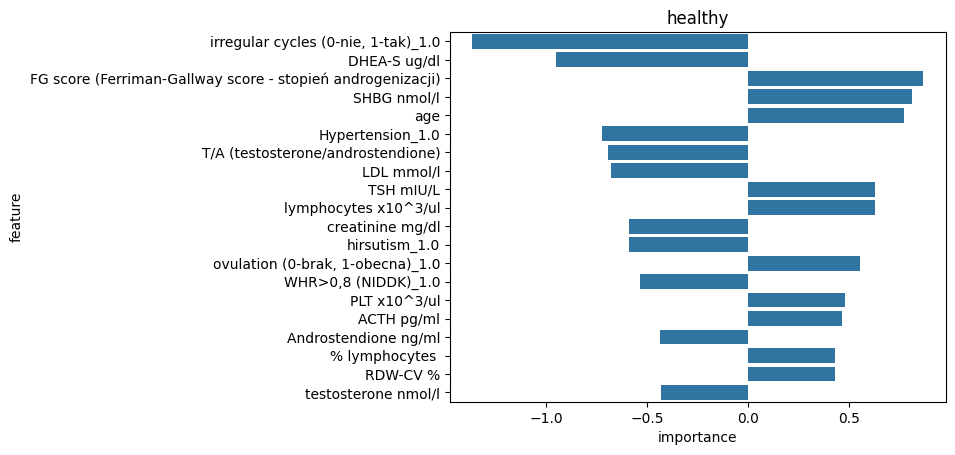

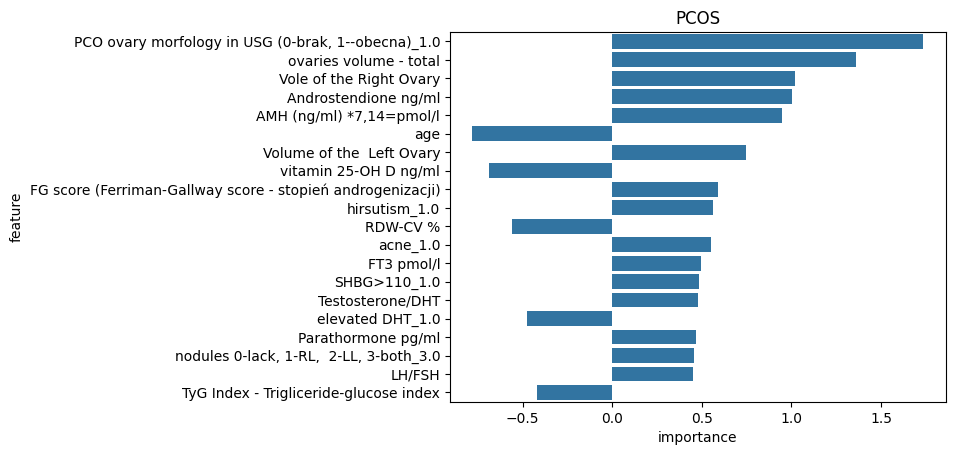

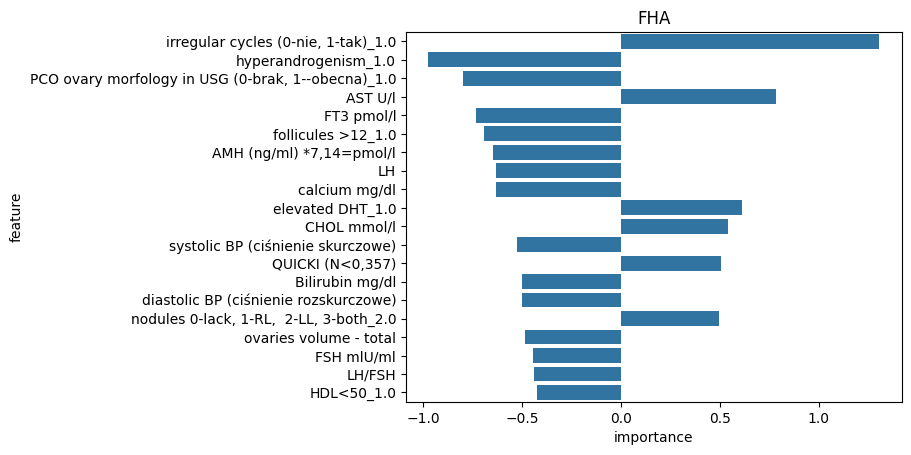

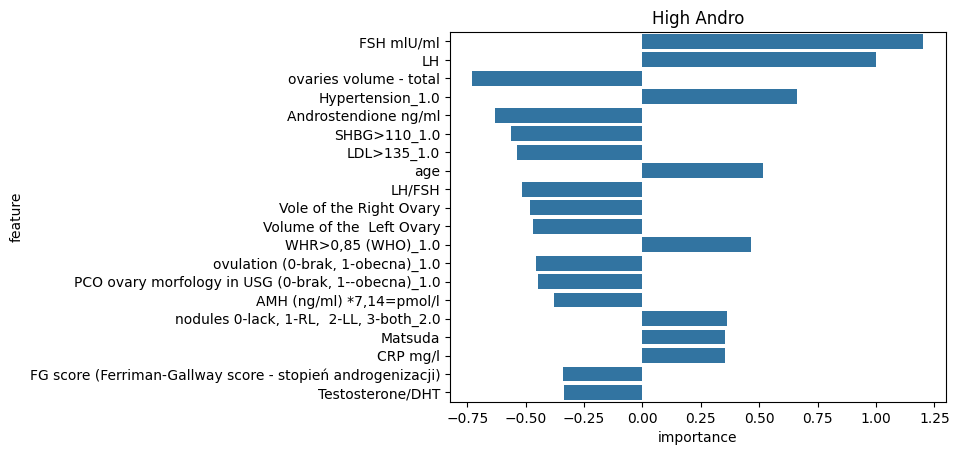

IndexError: list index out of range

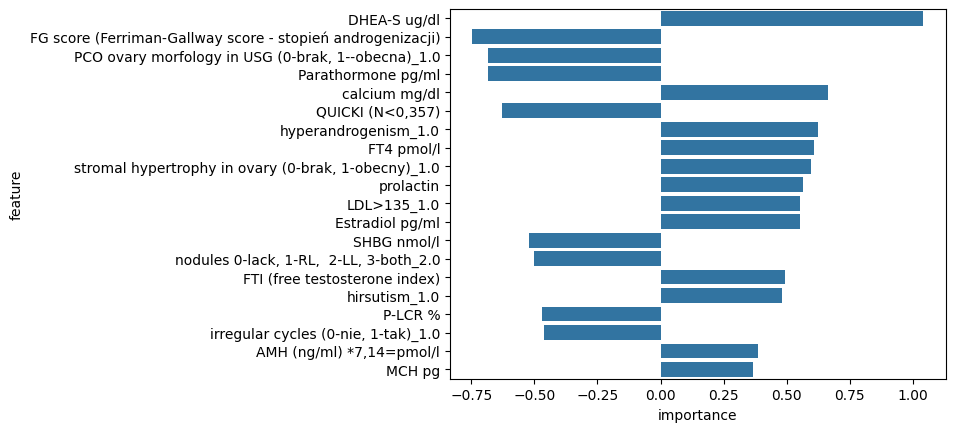

In [17]:
model_lr = LogisticRegression(C=0.5, multi_class='multinomial', max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


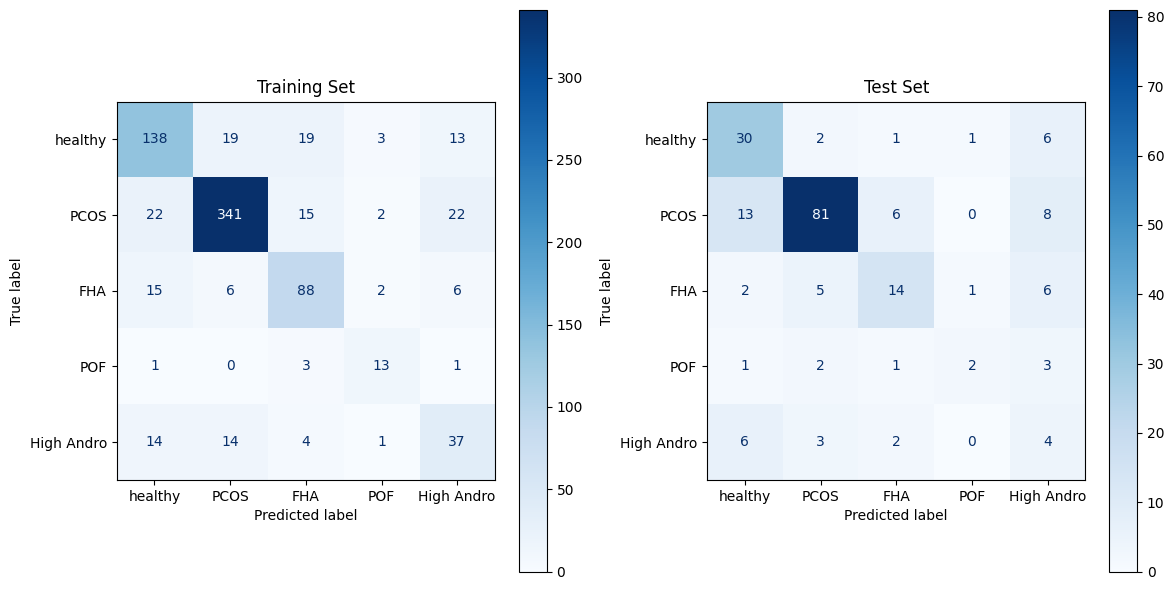

Training set
G-mean: 0.706
              precision    recall  f1-score   support

     healthy       0.73      0.72      0.72       192
        PCOS       0.90      0.85      0.87       402
         FHA       0.68      0.75      0.72       117
         POF       0.62      0.72      0.67        18
  High Andro       0.47      0.53      0.50        70

    accuracy                           0.77       799
   macro avg       0.68      0.71      0.69       799
weighted avg       0.78      0.77      0.78       799

G-mean: 0.441
Test set
              precision    recall  f1-score   support

     healthy       0.58      0.75      0.65        40
        PCOS       0.87      0.75      0.81       108
         FHA       0.58      0.50      0.54        28
         POF       0.50      0.22      0.31         9
  High Andro       0.15      0.27      0.19        15

    accuracy                           0.66       200
   macro avg       0.54      0.50      0.50       200
weighted avg       0.70    

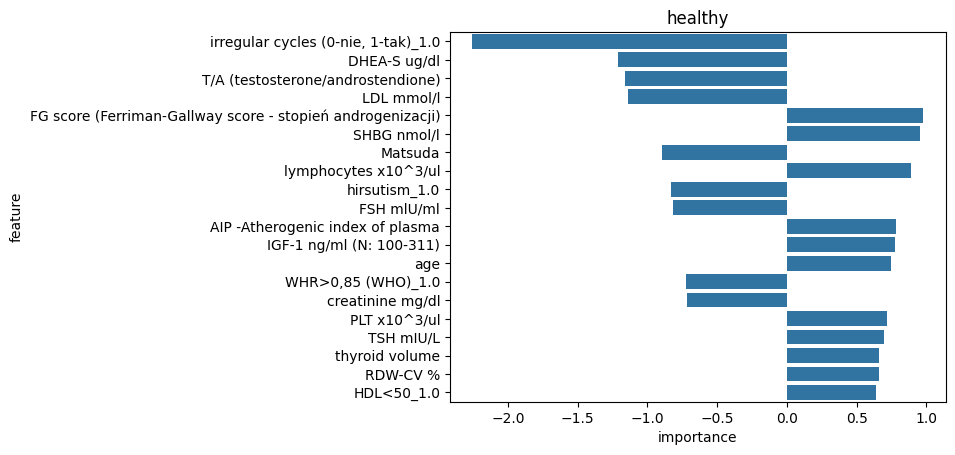

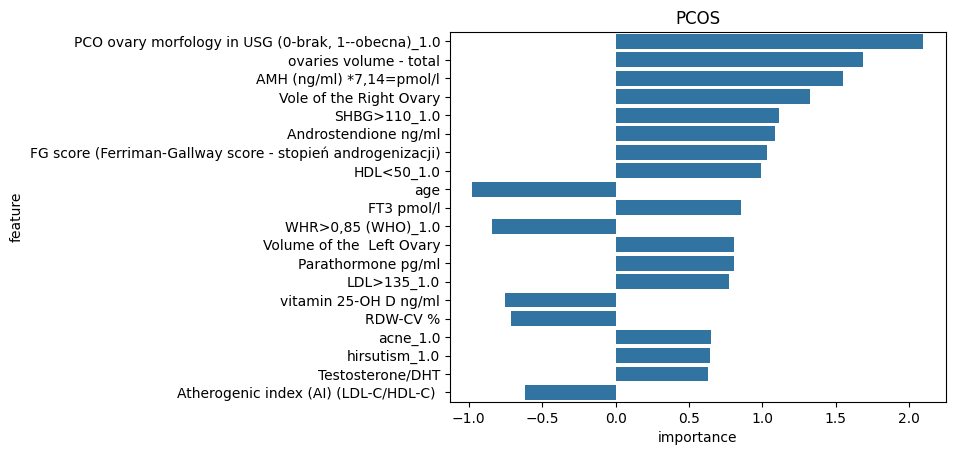

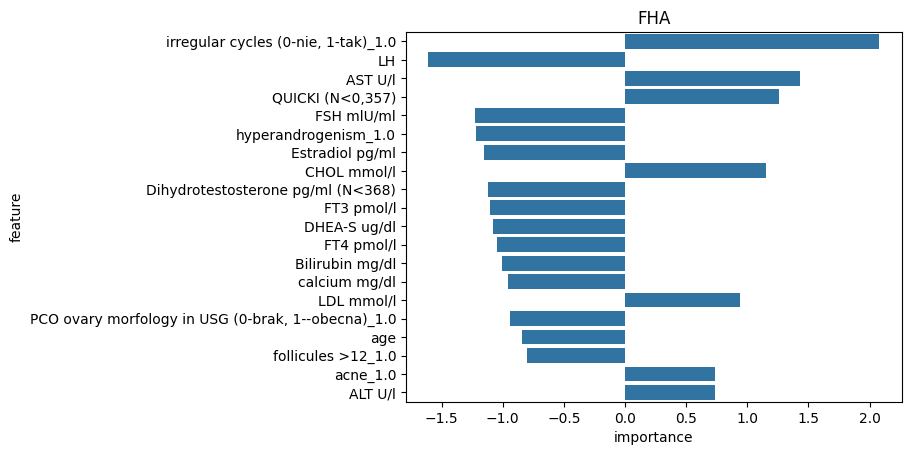

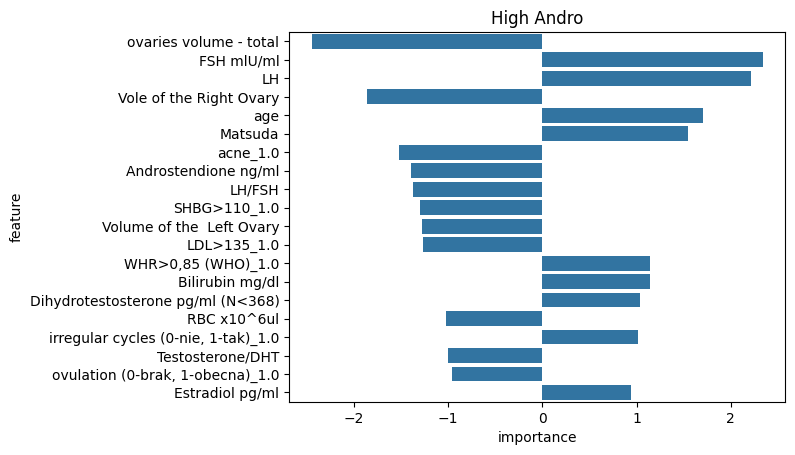

IndexError: list index out of range

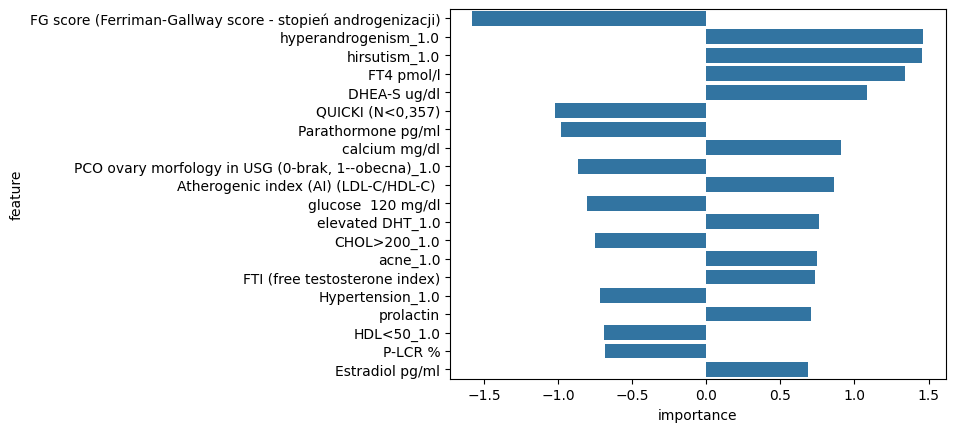

In [20]:
model_lr = LogisticRegression(C=0.5, multi_class='multinomial', max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification_smote(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_pipeline, categorical_imputer_pipeline, get_feature_importance_logistic_regressison)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


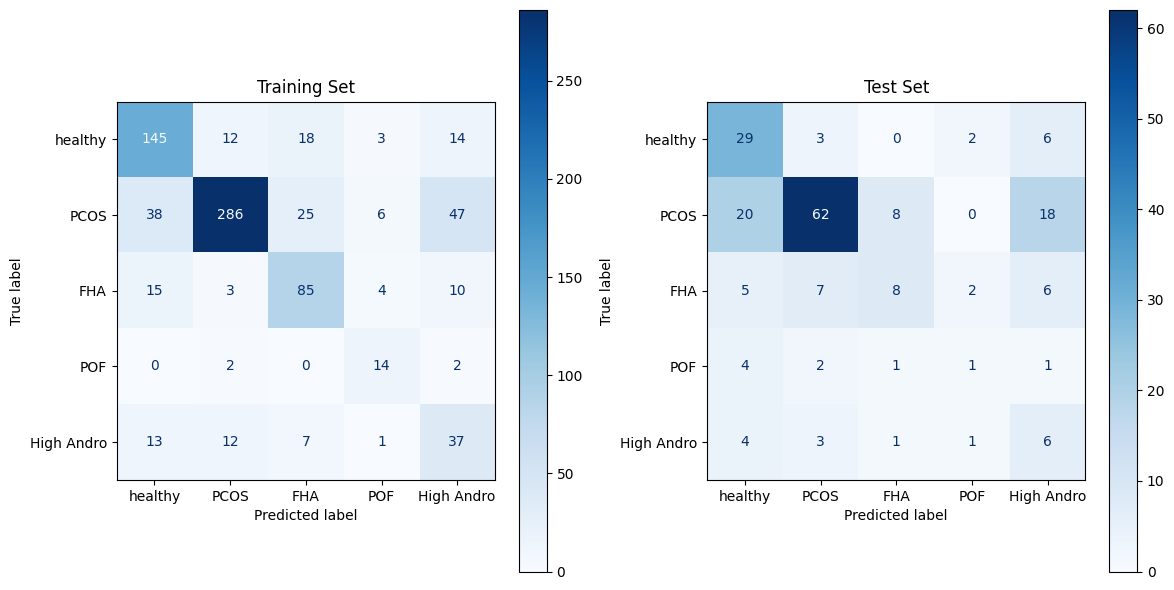

Training set
G-mean: 0.694
              precision    recall  f1-score   support

     healthy       0.69      0.76      0.72       192
        PCOS       0.91      0.71      0.80       402
         FHA       0.63      0.73      0.67       117
         POF       0.50      0.78      0.61        18
  High Andro       0.34      0.53      0.41        70

    accuracy                           0.71       799
   macro avg       0.61      0.70      0.64       799
weighted avg       0.75      0.71      0.72       799

G-mean: 0.35
Test set
              precision    recall  f1-score   support

     healthy       0.47      0.72      0.57        40
        PCOS       0.81      0.57      0.67       108
         FHA       0.44      0.29      0.35        28
         POF       0.17      0.11      0.13         9
  High Andro       0.16      0.40      0.23        15

    accuracy                           0.53       200
   macro avg       0.41      0.42      0.39       200
weighted avg       0.61     

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'

In [21]:
model_lr = KNeighborsClassifier()

feature_importnces_lr, pipeline_tlr = validate_model_classification_smote(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_pipeline, categorical_imputer_pipeline, get_feature_importance_logistic_regressison)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


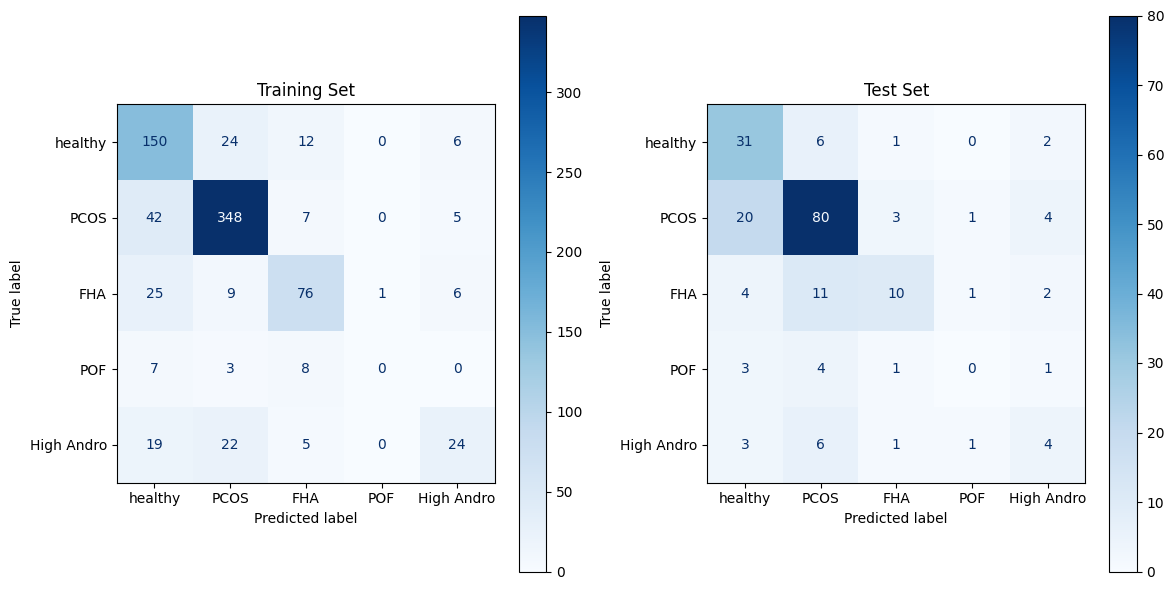

Training set
G-mean: 0.0
              precision    recall  f1-score   support

     healthy       0.62      0.78      0.69       192
        PCOS       0.86      0.87      0.86       402
         FHA       0.70      0.65      0.68       117
         POF       0.00      0.00      0.00        18
  High Andro       0.59      0.34      0.43        70

    accuracy                           0.75       799
   macro avg       0.55      0.53      0.53       799
weighted avg       0.73      0.75      0.74       799

G-mean: 0.0
Test set
              precision    recall  f1-score   support

     healthy       0.51      0.78      0.61        40
        PCOS       0.75      0.74      0.74       108
         FHA       0.62      0.36      0.45        28
         POF       0.00      0.00      0.00         9
  High Andro       0.31      0.27      0.29        15

    accuracy                           0.62       200
   macro avg       0.44      0.43      0.42       200
weighted avg       0.62      0.

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'

In [23]:
model_lr = KNeighborsClassifier()
feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

## Feature importance

In [9]:
selected_features_map = {}

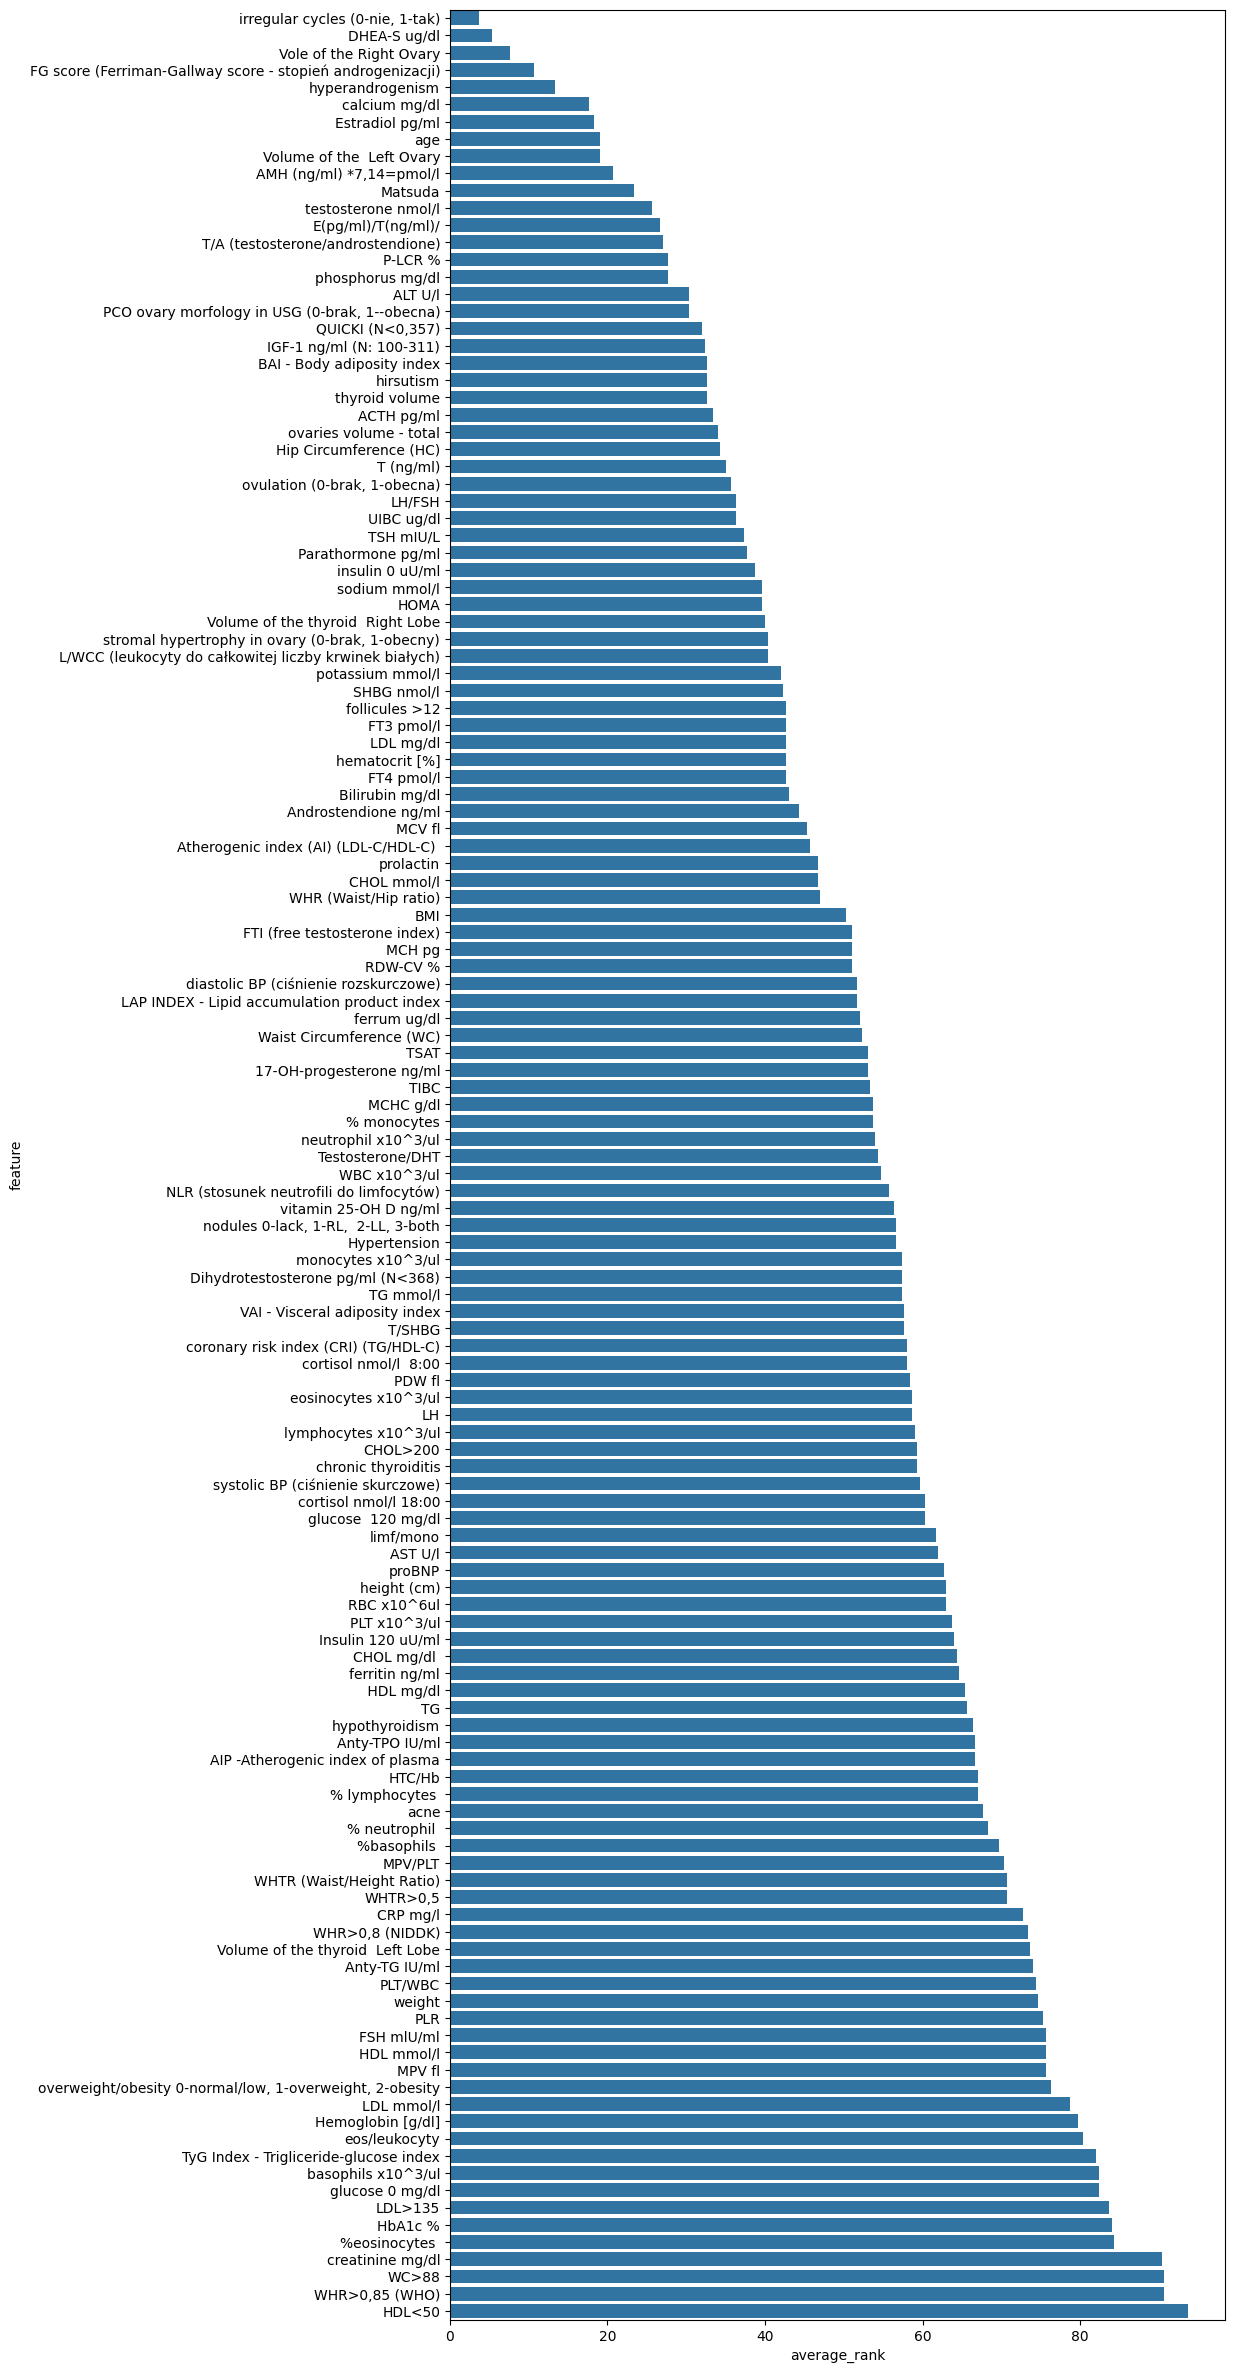

In [13]:
rename_importnace_col(feature_importnces_lr, 'logistic regression')
rename_importnace_col(feature_importnces_tree, 'tree')
rename_importnace_col(feature_importnces_rf, 'random forest')

feature_importance_df = merge_feature_importances([feature_importnces_lr, feature_importnces_tree, feature_importnces_rf])
ranked_df = rank_importances(feature_importance_df)

ranked_df_sorted = ranked_df.sort_values(by='average_rank')


plt.figure(figsize=(10, 30))
sns.barplot(ranked_df_sorted, x="average_rank", y="feature")
plt.show()

In [14]:
overall_rank_top_features = ranked_df_sorted[ranked_df_sorted['average_rank'] < 40] # a cut found on the plot above
overall_rank_selected_features = list(overall_rank_top_features['feature'].values)

selected_features_map['average_rank'] = overall_rank_selected_features
print(f'Top {len(overall_rank_selected_features)} features:')
overall_rank_selected_features

Top 35 features:


['irregular cycles (0-nie, 1-tak)',
 'DHEA-S ug/dl',
 'Vole of the Right Ovary',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'hyperandrogenism',
 'calcium mg/dl',
 'Estradiol pg/ml',
 'age',
 'Volume of the  Left Ovary',
 'AMH (ng/ml) *7,14=pmol/l',
 'Matsuda',
 'testosterone nmol/l',
 'E(pg/ml)/T(ng/ml)/',
 'T/A (testosterone/androstendione)',
 'P-LCR %',
 'phosphorus mg/dl',
 'ALT U/l',
 'PCO ovary morfology in USG (0-brak, 1--obecna)',
 'QUICKI (N<0,357)',
 'IGF-1 ng/ml (N: 100-311)',
 'BAI - Body adiposity index',
 'hirsutism',
 'thyroid volume',
 'ACTH pg/ml',
 'ovaries volume - total',
 'Hip Circumference (HC)',
 'T (ng/ml)',
 'ovulation (0-brak, 1-obecna)',
 'LH/FSH',
 'UIBC ug/dl',
 'TSH mIU/L',
 'Parathormone pg/ml',
 'insulin 0 uU/ml',
 'sodium mmol/l',
 'HOMA']

## Feature selection

### Chi 2

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Selected 20 features


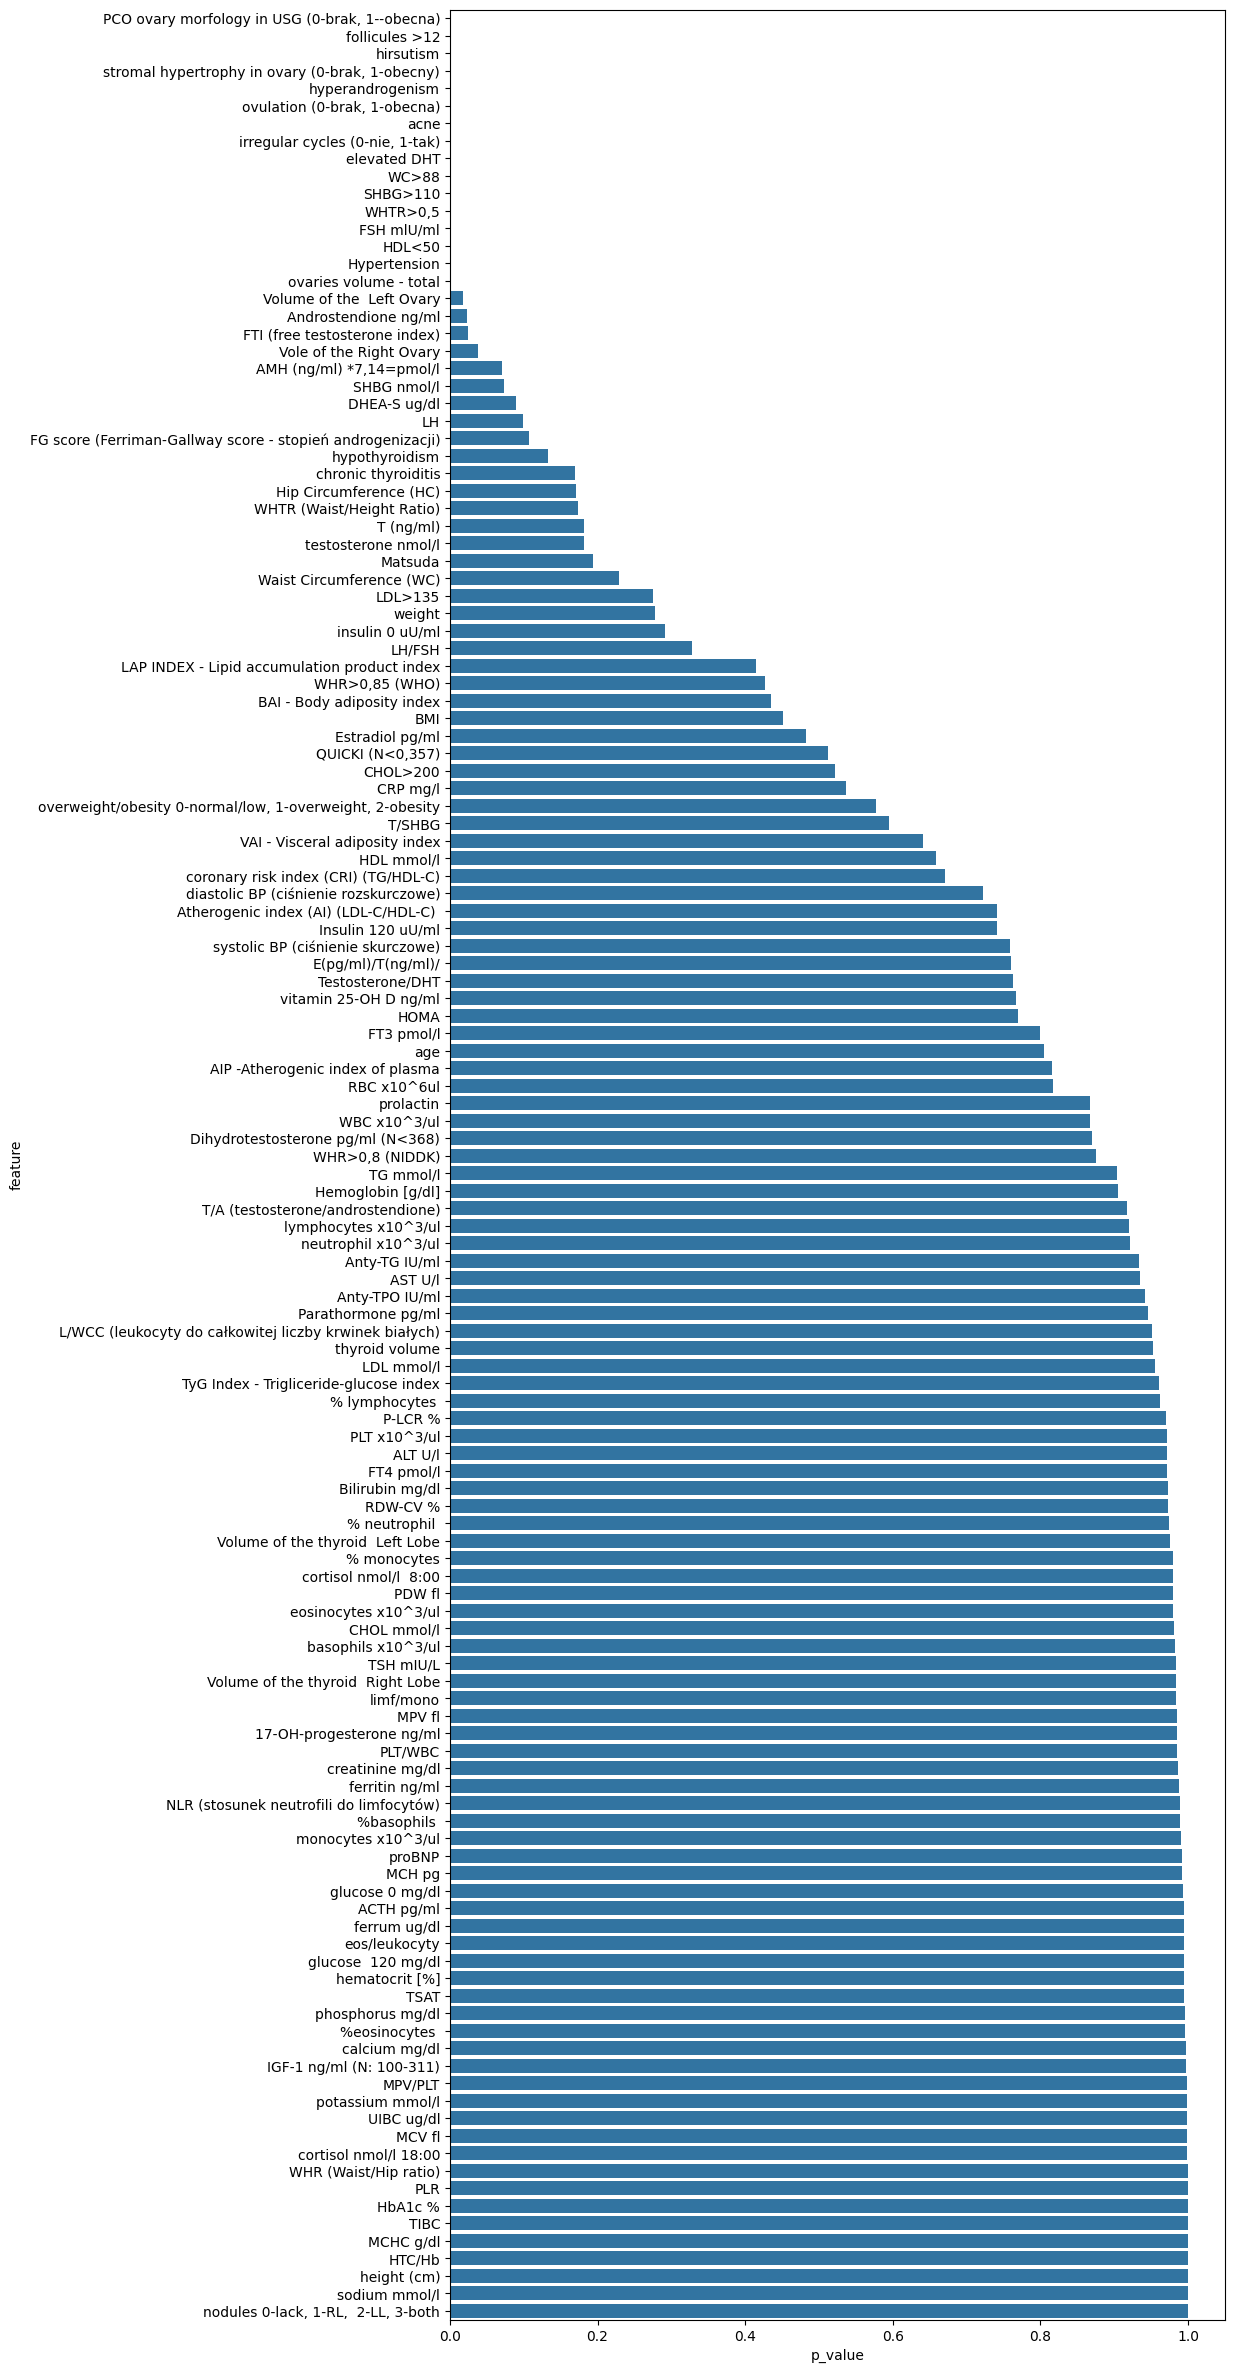

['PCO ovary morfology in USG (0-brak, 1--obecna)',
 'follicules >12',
 'hirsutism',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'hyperandrogenism',
 'ovulation (0-brak, 1-obecna)',
 'acne',
 'irregular cycles (0-nie, 1-tak)',
 'elevated DHT',
 'WC>88',
 'SHBG>110',
 'WHTR>0,5',
 'FSH mlU/ml',
 'HDL<50',
 'Hypertension',
 'ovaries volume - total',
 'Volume of the  Left Ovary',
 'Androstendione ng/ml',
 'FTI (free testosterone index)',
 'Vole of the Right Ovary']

In [10]:
selected_features_chi2 = feature_selection_chi2(SelectKBest(chi2, k=15), PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train)
selected_features_map['chi_2'] = selected_features_chi2
selected_features_chi2

### Mutual info

In [11]:
selected_feature_names_mutual_info = feature_selection_mutual_info_classification(X_train, y_train, PCO, continuous_preprocessor, categorical_preprocessor)
selected_feature_names_mutual_info = selected_feature_names_mutual_info[selected_feature_names_mutual_info['mutual_info_score'] > 0.005]

selected_feature_names_mutual_info.reset_index(drop=True, inplace=True)
print(f'Selected {len(selected_feature_names_mutual_info)} features')
selected_features_map['mutual_info'] = list(selected_feature_names_mutual_info['feature'].values)
# selected_feature_names_mutual_info

### Recursive Feature elimination

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Optimal number of features: 50


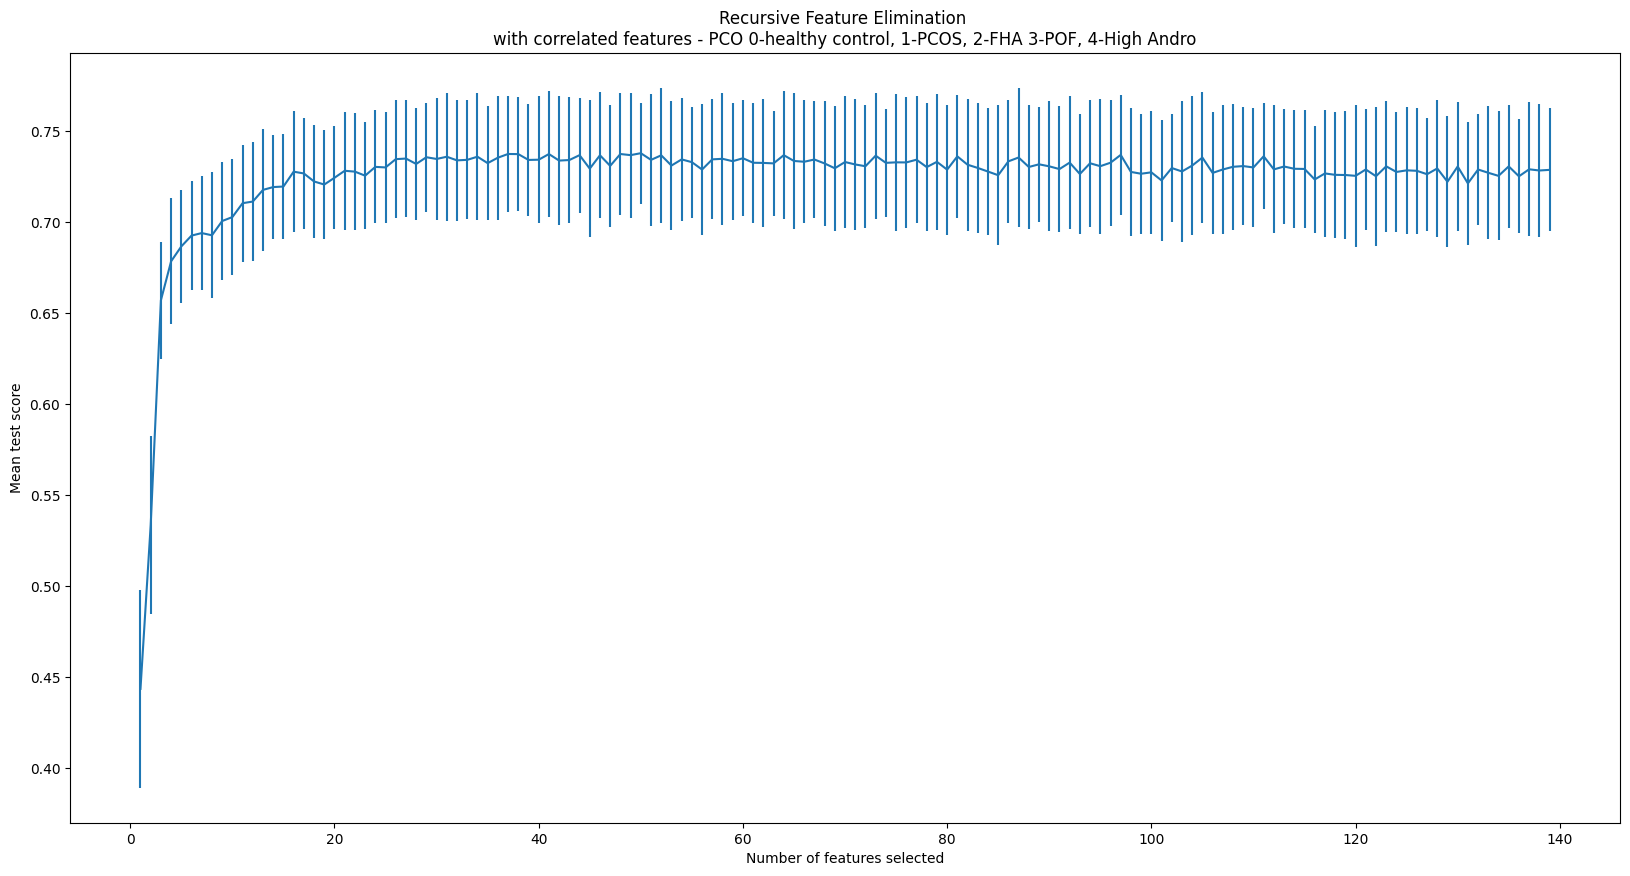

['SHBG nmol/l',
 'monocytes x10^3/ul',
 'HOMA',
 'irregular cycles (0-nie, 1-tak)',
 'insulin 0 uU/ml',
 'hyperandrogenism',
 'IGF-1 ng/ml (N: 100-311)',
 'follicules >12',
 'LDL mg/dl',
 'LH',
 'LH/FSH',
 'diastolic BP (ciśnienie rozskurczowe)',
 'cortisol nmol/l 18:00',
 'MCV fl',
 'calcium mg/dl',
 'Matsuda',
 'PCO ovary morfology in USG (0-brak, 1--obecna)',
 'QUICKI (N<0,357)',
 'Volume of the thyroid  Right Lobe',
 'vitamin 25-OH D ng/ml',
 'T (ng/ml)',
 'T/A (testosterone/androstendione)',
 'T/SHBG',
 'Volume of the  Left Ovary',
 'Vole of the Right Ovary',
 'TSAT',
 'TSH mIU/L',
 'Testosterone/DHT',
 'FTI (free testosterone index)',
 'FT4 pmol/l',
 'VAI - Visceral adiposity index',
 'proBNP',
 'FT3 pmol/l',
 'ALT U/l',
 'BAI - Body adiposity index',
 'sodium mmol/l',
 'Bilirubin mg/dl',
 'phosphorus mg/dl',
 'AMH (ng/ml) *7,14=pmol/l',
 'prolactin',
 'ovaries volume - total',
 'systolic BP (ciśnienie skurczowe)',
 'thyroid volume',
 'DHEA-S ug/dl',
 'Dihydrotestosterone pg/ml (

In [19]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

recursive_feature_elimination_ranked_features_lasso = recursive_feature_elimination(X_train, y_train, lasso_model, PCO, continuous_preprocessor, categorical_preprocessor, scoring_metric='f1_weighted')
selected_features_map['recursive_feature_elimination'] = list(recursive_feature_elimination_ranked_features_lasso[recursive_feature_elimination_ranked_features_lasso['ranking'] == 1]['feature'].values)
selected_features_map['recursive_feature_elimination']

### Gini index

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Selected 0 features


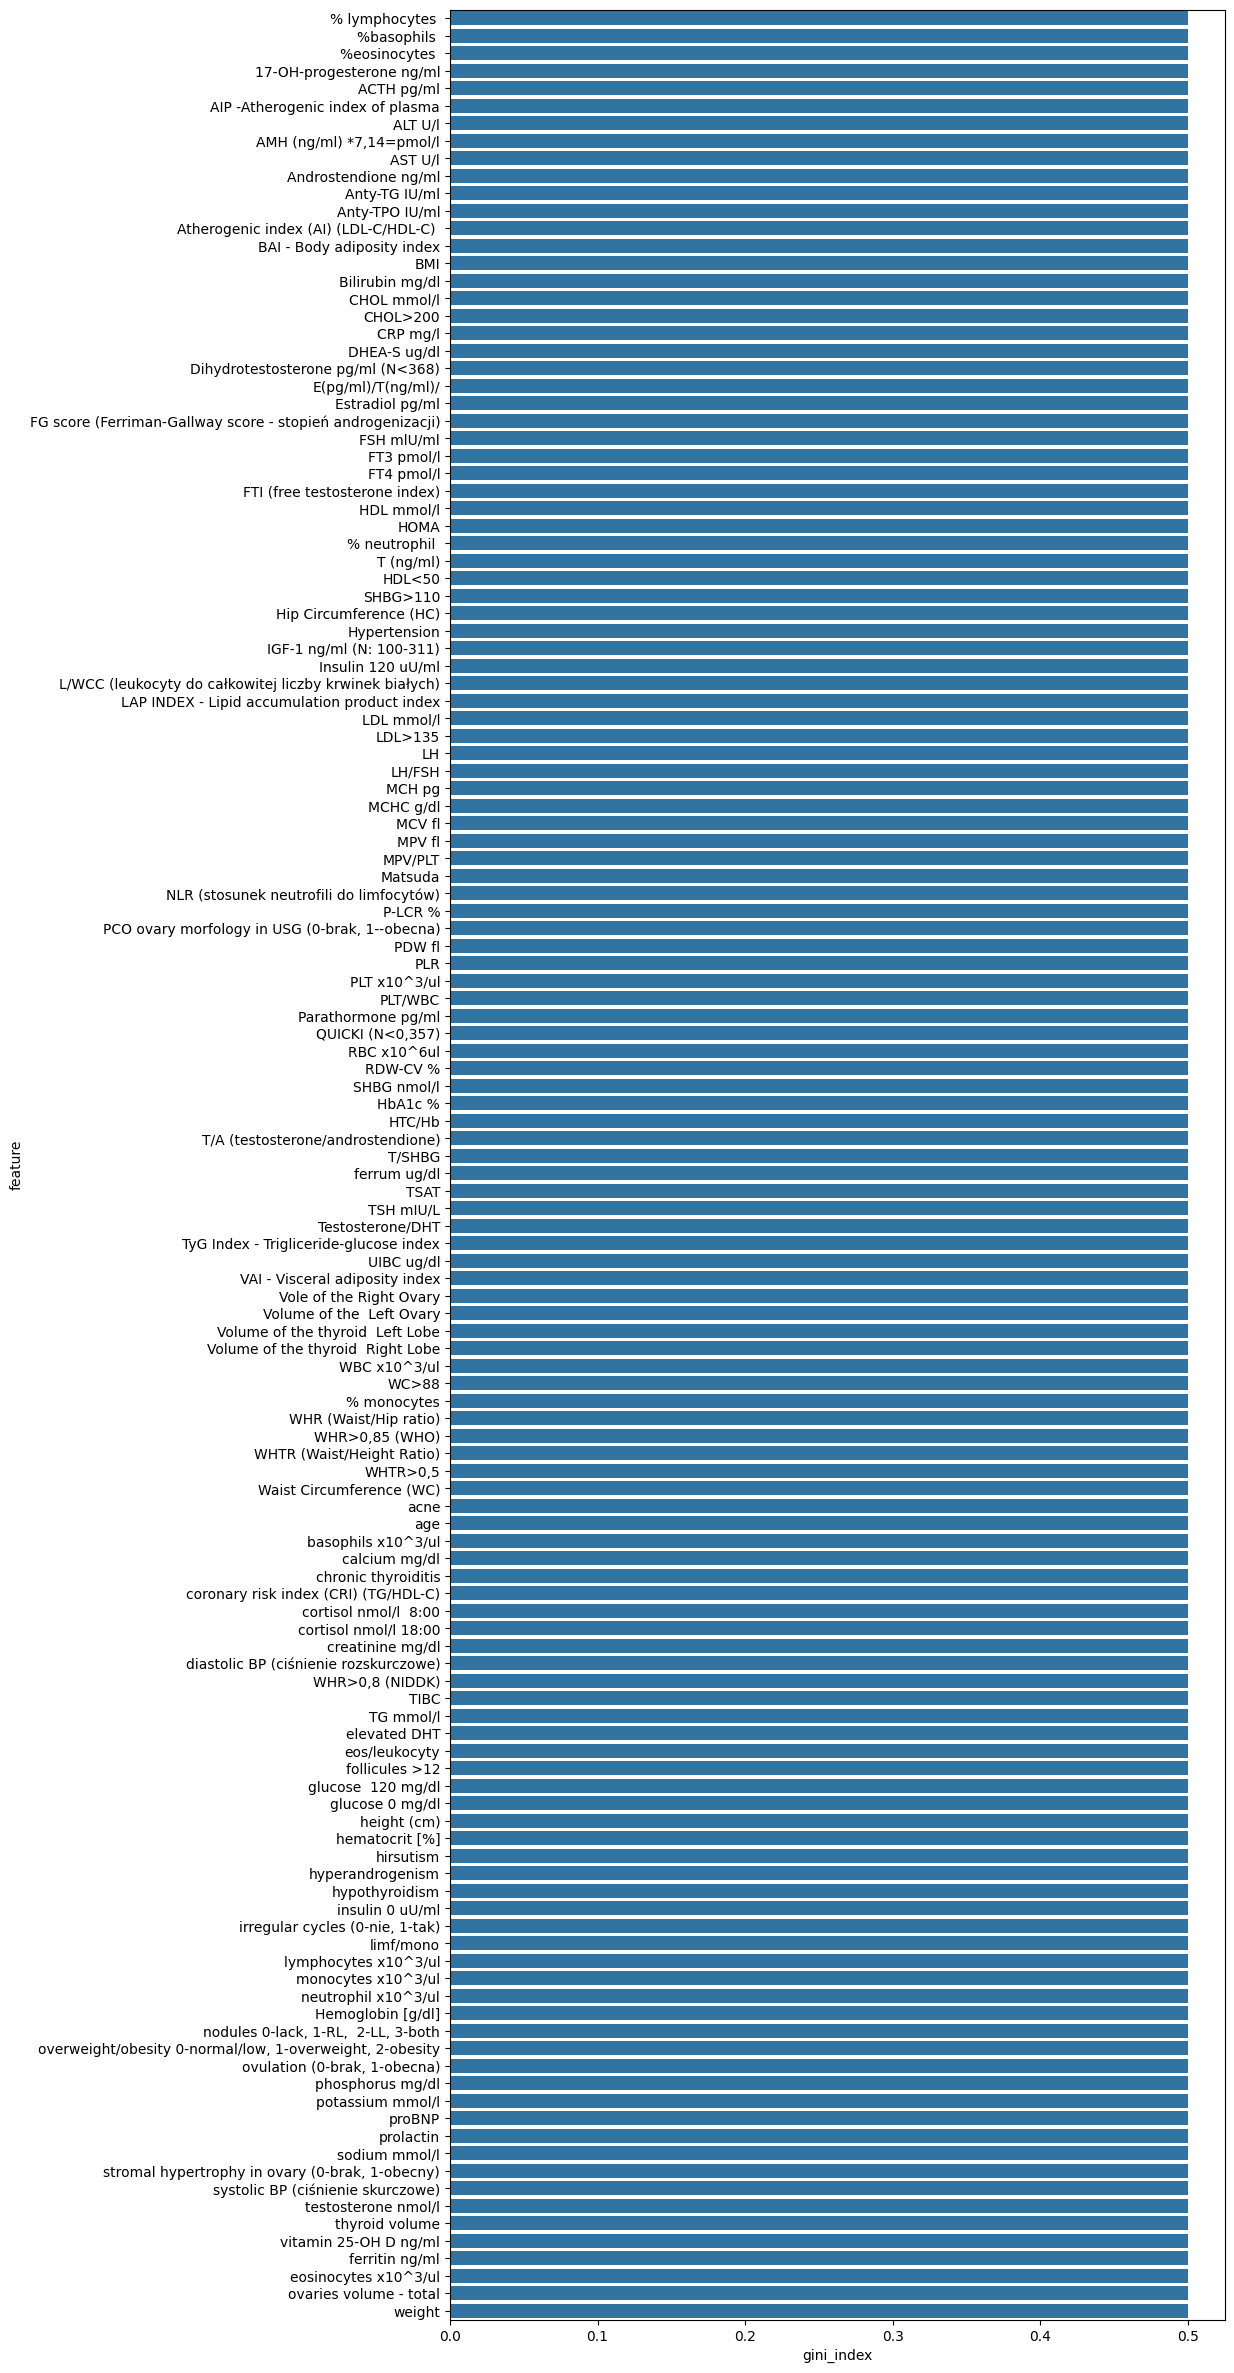

[]

In [23]:
threshold = 0.5
gini_index_selected_features = feature_selection_gini_index(PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=threshold)

#  NOTE: we don't consider it as a constraint because it would select either one feature or all of them
# selected_features_map['permutation_importance'] = gini_index_selected_features
gini_index_selected_features

### Permutation importance

In [28]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=15, class_weight=None, random_state=72)


selected_features_permutation_importance = get_permutation_importance(X_train, y_train, model_rf, continuous_preprocessor, categorical_preprocessor, PCO)
selected_features_permutation_importance = selected_features_permutation_importance[selected_features_permutation_importance['importance'] > 0.005]
selected_features_map['permutation_importance'] = list(selected_features_permutation_importance['feature'].values)
print(f'Actually selected {len(selected_features_map['permutation_importance'])} features')
# selected_features_permutation_importance

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


KeyboardInterrupt: 

In [22]:
intersection_all_sets = set(selected_features_map[next(iter(selected_features_map))])

for key, items in selected_features_map.items():
    intersection_all_sets.intersection_update(items)


intersection_all_sets = list(intersection_all_sets)
print(len(intersection_all_sets))
print(intersection_all_sets)

pd.DataFrame(intersection_all_sets)

6
['Vole of the Right Ovary', 'irregular cycles (0-nie, 1-tak)', 'ovaries volume - total', 'PCO ovary morfology in USG (0-brak, 1--obecna)', 'hyperandrogenism', 'Volume of the  Left Ovary']


0
0                         Vole of the Right Ovary
1                 irregular cycles (0-nie, 1-tak)
2                          ovaries volume - total
3  PCO ovary morfology in USG (0-brak, 1--obecna)
4                                hyperandrogenism
5                       Volume of the  Left Ovary

In [23]:
union_all_sets = set(selected_features_map[next(iter(selected_features_map))]) 

for key, items in selected_features_map.items():
    union_all_sets.update(items)
    

union_all_sets = list(union_all_sets)
print(len(union_all_sets))
print(union_all_sets)

128
['HbA1c %', 'Parathormone pg/ml', 'HOMA', 'basophils x10^3/ul', 'height (cm)', 'WHR>0,85 (WHO)', 'thyroid volume', 'ovaries volume - total', 'lymphocytes x10^3/ul', 'Volume of the  Left Ovary', 'T/A (testosterone/androstendione)', 'AMH (ng/ml) *7,14=pmol/l', 'cortisol nmol/l 18:00', 'Volume of the thyroid  Right Lobe', 'BAI - Body adiposity index', 'MCV fl', 'glucose  120 mg/dl', 'TG mmol/l', 'CRP mg/l', 'insulin 0 uU/ml', 'WBC x10^3/ul', 'WHR (Waist/Hip ratio)', 'BMI', 'FT4 pmol/l', '%basophils ', 'monocytes x10^3/ul', 'CHOL mg/dl ', 'testosterone nmol/l', 'PDW fl', 'Testosterone/DHT', 'FT3 pmol/l', 'HTC/Hb', 'LDL mg/dl', 'ACTH pg/ml', 'Dihydrotestosterone pg/ml (N<368)', 'FSH mlU/ml', 'stromal hypertrophy in ovary (0-brak, 1-obecny)', '% monocytes', 'Insulin 120 uU/ml', 'DHEA-S ug/dl', 'SHBG nmol/l', 'PLR', '% neutrophil ', 'Vole of the Right Ovary', 'T/SHBG', 'Matsuda', 'TyG Index - Trigliceride-glucose index', 'glucose 0 mg/dl', 'hirsutism', 'LH/FSH', 'coronary risk index (CRI)